In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests


wth= pd.read_csv('wth_data.csv')

seoul = pd.read_csv('data_따릉/대여소정보.csv')

#필요한 컬럼만 추출
seoul = seoul[['대여소번호', '자치구']]

search = pd.read_csv('data_따릉/일별_따릉이_검색량.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'wth_data.csv'

In [ ]:
## 2018년 전처리

# 2018년 csv 파일을 불러 병합
csvfiles = glob.glob('data_따릉/2018/*.csv')
data = pd.DataFrame()

for csvfile in csvfiles:
    try:
        tmp = pd.read_csv(csvfile, encoding='cp949', low_memory = False)   
    except: 
        tmp = pd.read_csv(csvfile, encoding='utf-8', low_memory = False)
        print('파일 좀 이상해 살펴봐 : ', csvfile)
    data = pd.concat([data, tmp]) 
data.reset_index(drop=True, inplace=True)

# 컬럼명 동일하게 변경
col = data.columns

df18_7 = pd.read_csv('data_따릉/2018\\공공자전거 이용정보(일별)_2018.07_12.csv', encoding='utf-8', low_memory = False,
           names=col)

# 다시 overite 위해 이름 같게 저장
df18_7.to_csv('공공자전거 이용정보(일별)_2018.07_12.csv', index=False)

# 컬럼명 깔끔하게 변경
data.columns = ['대여일자', '대여소번호', '대여소', '대여구분코드', 'SEX_CD', '연령대코드',
       '이용건수', '운동량', '탄소량', '이동거리(M)', '이동시간(분)']

data18 = data

#병합 전 전처리
data18.replace(r"'", r'', regex=True, inplace=True)
data18['대여소번호'].replace(' ','', inplace=True) # '상암센터 정비실', '중랑센터'등 문자열 때문에 

seoul['대여소번호'] = seoul['대여소번호'].astype(str)

bike18=data18.merge(seoul, on='대여소번호', how='inner')

bike18.isna().sum()

bike18.head()

## 2019년 전처리

In [196]:
# 2019년 csv 파일을 불러 병합
csvfiles = glob.glob('data_따릉/2019/*.csv')
data = pd.DataFrame()

for csvfile in csvfiles:
    try:
        tmp = pd.read_csv(csvfile, encoding='cp949', low_memory = False)   
    except: 
        tmp = pd.read_csv(csvfile, encoding='utf-8', low_memory = False)
        print('파일 좀 이상해 살펴봐 : ', csvfile)
    data = pd.concat([data, tmp]) 
data.reset_index(drop=True, inplace=True)

파일 좀 이상해 살펴봐 :  data_따릉/2019\공공자전거 이용정보(일별)_2019.01_05.csv


In [193]:
df19_01 = pd.read_csv('data_따릉/2019\공공자전거 이용정보(일별)_2019.01_05.csv', encoding='utf-8', low_memory = False, names= col)

In [189]:
# data.columns() 참고하여 지정
col = ['대여일자', '대여소번호', '대여소', '대여구분코드',
       '성별', '연령대코드', '이용건수', '운동량', '탄소량', '이동거리(M)', '이용시간(분)']

In [195]:
df19_01.to_csv('공공자전거 이용정보(일별)_2019.01_05.csv', index=False)

In [199]:
# 이동거리와 이용거리로 컬럼명이 같지 않아서 문제 발생된 것 확인
data.sample(5)

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),이용거리(M)
6706631,2019-12-28,1528,1528. 삼각산동 주민센터,일일(회원),\N,AGE_004,1,28.44,0.29,1260.0,46,NaN
4257162,2019-09-03,1654,1654. 당고개입구 오거리,정기,\N,AGE_002,6,1961.26,13.1,NaN,89,56470.0
2254908,2019-06-12,1943,1943. 온수역 북측,정기,\N,AGE_005,2,122.5,1.05,4510.0,32,NaN
4784305,2019-09-27,1306,1306. 한성대입구역2번출구,정기,NaN,AGE_005,1,42.74,0.35,NaN,10,1520.0
5370918,2019-10-20,389,389. 을지로4가역 1번출구,일일(회원),\N,AGE_002,1,122.66,0.96,4130.0,18,NaN


In [198]:
#일단 저장
data19 = data

In [204]:
data19['이동거리(M)']= data19['이동거리(M)'].add(data19['이용거리(M)'],fill_value=0)

In [206]:
data19.drop(columns='이용거리(M)', inplace=True)

In [227]:
seoul['대여소번호'] = seoul['대여소번호'].astype(int)

In [228]:
bike19=data19.merge(seoul, on='대여소번호', how='inner')

In [229]:
bike19.isna().sum()

대여일자             0
대여소번호            0
대여소              0
대여구분코드           0
성별         1458649
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리(M)          0
이용시간(분)          0
자치구              0
dtype: int64

In [232]:
bike19.head(5)

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),자치구
0,2019-01-01,108,108. 서교동 사거리,정기,NaN,\N,2,95.64,0.83,3580.0,27,마포구
1,2019-01-01,108,108. 서교동 사거리,정기,F,20대,2,185.42,1.99,8580.0,56,마포구
2,2019-01-01,108,108. 서교동 사거리,정기,M,20대,2,85.48,0.79,3380.0,22,마포구
3,2019-01-01,108,108. 서교동 사거리,정기,M,30대,1,58.21,0.45,1960.0,7,마포구
4,2019-01-01,108,108. 서교동 사거리,일일(회원),NaN,\N,1,95.45,1.22,5240.0,28,마포구


## 2020년 전처리

In [299]:
# 2020년 csv 파일을 불러 병합
csvfiles = glob.glob('data_따릉/2020/*.csv')
data = pd.DataFrame()

for csvfile in csvfiles:
    try:
        tmp = pd.read_csv(csvfile, encoding='cp949', low_memory = False)   
    except: 
        tmp = pd.read_csv(csvfile, encoding='utf-8', low_memory = False)
        print('파일 좀 이상해 살펴봐 : ', csvfile)
    data = pd.concat([data, tmp]) 
data.reset_index(drop=True, inplace=True)

In [300]:
csvfiles

['data_따릉/2020\\공공자전거 이용정보(일별)_2020.01_05.csv',
 'data_따릉/2020\\공공자전거 이용정보(일별)_2020.06.csv',
 'data_따릉/2020\\공공자전거 이용정보(일별)_2020.07_12.csv']

In [301]:
data.sample(5)

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
9039511,2020-12-23,2527,2527.반포중학교 앞(세화여고 맞은편),정기,\N,AGE_004,2,28.75,0.26,1100.19,100
7238805,2020-10-17,1951,1951. 천왕이펜하우스 4단지 상가 앞,정기,M,AGE_002,1,0.00,0.00,0.00,115
7109001,2020-10-13,2535,2535.신반포역 3번출구 뒤,정기,F,AGE_002,1,0.00,0.00,0.00,66
5901122,2020-09-09,2113,2113. 관악동작견인차량보관소,정기,F,AGE_003,3,0.00,0.00,0.00,115
5355130,2020-08-20,1160,1160. 양천향교역 7번출구앞,정기,F,AGE_003,10,67.13,0.76,3260.00,210


In [302]:
data20 = data

In [303]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9199282 entries, 0 to 9199281
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여소번호    int64  
 2   대여소      object 
 3   대여구분코드   object 
 4   성별       object 
 5   연령대코드    object 
 6   이용건수     int64  
 7   운동량      object 
 8   탄소량      object 
 9   이동거리(M)  float64
 10  이용시간(분)  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 772.0+ MB


In [304]:
data20.isna().sum()

대여일자            0
대여소번호           0
대여소             0
대여구분코드          0
성별         902117
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리(M)         0
이용시간(분)         0
dtype: int64

In [305]:
bike20=data20.merge(seoul, on='대여소번호', how='inner')

In [306]:
bike20.isna().sum()

대여일자            0
대여소번호           0
대여소             0
대여구분코드          0
성별         902081
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리(M)         0
이용시간(분)         0
자치구             0
dtype: int64

In [441]:
bike20.tail(5)

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),자치구
9197431,2020-12-30,2914,2914.서울과학기술대학교(미래관),정기,NaN,AGE_003,1,0.00,0.00,0.00,14,노원구
9197432,2020-12-30,2914,2914.서울과학기술대학교(미래관),정기,M,AGE_002,1,18.16,0.16,705.33,6,노원구
9197433,2020-12-31,2914,2914.서울과학기술대학교(미래관),정기,\N,AGE_002,3,84.81,0.67,2871.84,26,노원구
9197434,2020-12-31,2914,2914.서울과학기술대학교(미래관),정기,M,AGE_002,1,16.32,0.15,634.07,4,노원구
9197435,2020-12-31,2914,2914.서울과학기술대학교(미래관),정기,M,AGE_003,2,0.00,0.00,0.00,33,노원구


## 2021년 전처리

In [444]:
# 2021년 csv 파일을 불러 병합
# 파일이 깨져있어서 전처리를 한 후 병합
csvfiles = glob.glob('data_따릉/2021/*.csv')
data = pd.DataFrame()

for csvfile in csvfiles:
    try:
        tmp = pd.read_csv(csvfile, encoding='cp949', low_memory = False)   
    except: 
        print('파일 좀 이상해 살펴봐 : ', csvfile)
        tmp = pd.read_csv(csvfile, encoding='iso-8859-1', low_memory = False)
        tmp.columns = ['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)']
        tmp = tmp[tmp['대여소번호']<5856]
        tmp['대여구분코드'] = tmp['대여구분코드'].apply(lambda x : '일일(회원)'  if '(' in x else '정기')
        
    data = pd.concat([data, tmp]) 
data.reset_index(drop=True, inplace=True)

파일 좀 이상해 살펴봐 :  data_따릉/2021\공공자전거 이용정보(일별)_2021.06_재산출.csv
파일 좀 이상해 살펴봐 :  data_따릉/2021\공공자전거 이용정보(일별)_2021.07.csv
파일 좀 이상해 살펴봐 :  data_따릉/2021\공공자전거 이용정보(일별)_2021.08.csv
파일 좀 이상해 살펴봐 :  data_따릉/2021\공공자전거 이용정보(일별)_2021.09.csv
파일 좀 이상해 살펴봐 :  data_따릉/2021\공공자전거 이용정보(일별)_2021.10.csv
파일 좀 이상해 살펴봐 :  data_따릉/2021\공공자전거 이용정보(일별)_2021.11.csv
파일 좀 이상해 살펴봐 :  data_따릉/2021\공공자전거 이용정보(일별)_2021.12.csv


In [446]:
data21 = data

In [449]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12764146 entries, 0 to 12764145
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여소번호    int64  
 2   대여소      object 
 3   대여구분코드   object 
 4   성별       object 
 5   연령대코드    object 
 6   이용건수     int64  
 7   운동량      object 
 8   탄소량      object 
 9   이동거리(M)  float64
 10  이용시간(분)  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.0+ GB


In [448]:
data21.isna().sum()

대여일자            0
대여소번호           0
대여소             0
대여구분코드          0
성별         937466
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리(M)         0
이용시간(분)         0
dtype: int64

In [450]:
bike21=data21.merge(seoul, on='대여소번호', how='inner')

In [451]:
bike21.isna().sum()

대여일자            0
대여소번호           0
대여소             0
대여구분코드          0
성별         936877
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리(M)         0
이용시간(분)         0
자치구             0
dtype: int64

In [452]:
bike21.tail(5)

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),자치구
12753883,2021-12-31,3886,3886.±¤Áø±¸ ¹Î¹æÀ§±³À°¼¾ÅÍ,일일(회원),F,AGE_008,1,7.98,0.10,420.0,3,광진구
12753884,2021-12-31,3886,3886.±¤Áø±¸ ¹Î¹æÀ§±³À°¼¾ÅÍ,정기,\N,AGE_002,1,37.21,0.27,1160.0,10,광진구
12753885,2021-12-31,3886,3886.±¤Áø±¸ ¹Î¹æÀ§±³À°¼¾ÅÍ,정기,\N,AGE_004,4,268.05,2.02,8700.0,65,광진구
12753886,2021-12-31,3886,3886.±¤Áø±¸ ¹Î¹æÀ§±³À°¼¾ÅÍ,정기,\N,AGE_005,1,11.81,0.10,420.0,2,광진구
12753887,2021-12-31,3886,3886.±¤Áø±¸ ¹Î¹æÀ§±³À°¼¾ÅÍ,정기,F,AGE_005,1,95.52,0.93,4020.0,41,광진구


## total 전처리

In [453]:
bike21.to_csv('전처리21.csv', index=False)

In [459]:
# 컬럼명 확인하고 통일
col =['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)', '자치구']

In [461]:
bike18.columns

Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)', '자치구'],
      dtype='object')

In [456]:
bike19.columns

Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)', '자치구'],
      dtype='object')

In [457]:
bike20.columns

Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)', '자치구'],
      dtype='object')

In [455]:
bike21.columns

Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)', '자치구'],
      dtype='object')

In [466]:
# 일자별 자치구별 이용건수 구하기
total18 = pd.pivot_table(bike18, index = '대여일자', columns='자치구', values='이용건수', aggfunc = 'sum').reset_index()
total19 = pd.pivot_table(bike19, index = '대여일자', columns='자치구', values='이용건수', aggfunc = 'sum').reset_index()
total20 = pd.pivot_table(bike20, index = '대여일자', columns='자치구', values='이용건수', aggfunc = 'sum').reset_index()
total21 = pd.pivot_table(bike21, index = '대여일자', columns='자치구', values='이용건수', aggfunc = 'sum').reset_index()

In [474]:
total= pd.concat([total18, total19, total20, total21])

In [481]:
total.to_csv('자치구별합계.csv')

## 독립변수 전처리

In [483]:
wth.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
search.columns = ['일시', '검색량']

In [495]:
wth['일시'] = pd.to_datetime(wth['일시'])
search['일시'] = pd.to_datetime(search['일시'])
total['대여일자'] = pd.to_datetime(total['대여일자'])

In [496]:
wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일시              1618 non-null   datetime64[ns]
 1   최저기온            1618 non-null   float64       
 2   최고기온            1618 non-null   float64       
 3   평균기온            1618 non-null   float64       
 4   강수여부            1618 non-null   int64         
 5   평균풍속            1618 non-null   float64       
 6   평균습도            1618 non-null   float64       
 7   일 미세먼지 농도(㎍/㎥)  1618 non-null   int64         
 8   휴일여부            1618 non-null   int64         
 9   요일              1618 non-null   int64         
 10  계절              1618 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 139.2 KB


In [497]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      1795 non-null   datetime64[ns]
 1   검색량     1795 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 28.2 KB


In [500]:
add = wth.merge(search, on = '일시')

In [516]:
x = add[add['일시'] < '2022-01-01']

In [520]:
total.columns = ['일시', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [524]:
end = x.merge(total, on = '일시')

In [547]:
end['year'] = end.일시.apply(lambda x : x.year)
end['month'] = end.일시.apply(lambda x : x.month)
end['day'] = end.일시.apply(lambda x : x.day)

In [551]:
#순서변경
end= end[['일시','year',
       'month', 'day', 'hour', '최저기온', '최고기온', '평균기온', '강수여부', '평균풍속', '평균습도', '일 미세먼지 농도(㎍/㎥)',
       '휴일여부', '요일', '계절', '검색량', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
       '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구' ]]

In [556]:
end.to_csv('2018-2021년_일자_자치구별_따릉이_이용건수.csv', index=False)

In [557]:
end.columns

Index(['일시', 'year', 'month', 'day', '최저기온', '최고기온', '평균기온', '강수여부', '평균풍속',
       '평균습도', '일 미세먼지 농도(㎍/㎥)', '휴일여부', '요일', '계절', '검색량', '강남구', '강동구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구',
       '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
       '종로구', '중구', '중랑구'],
      dtype='object')

In [558]:
test = end[['year', 'month', 'day', '평균기온', '평균풍속', '평균습도', '일 미세먼지 농도(㎍/㎥)','검색량', '영등포구']]

In [559]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            1303 non-null   int64  
 1   month           1303 non-null   int64  
 2   day             1303 non-null   int64  
 3   평균기온            1303 non-null   float64
 4   평균풍속            1303 non-null   float64
 5   평균습도            1303 non-null   float64
 6   일 미세먼지 농도(㎍/㎥)  1303 non-null   int64  
 7   검색량             1303 non-null   int64  
 8   영등포구            1303 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 101.8 KB


<AxesSubplot:>

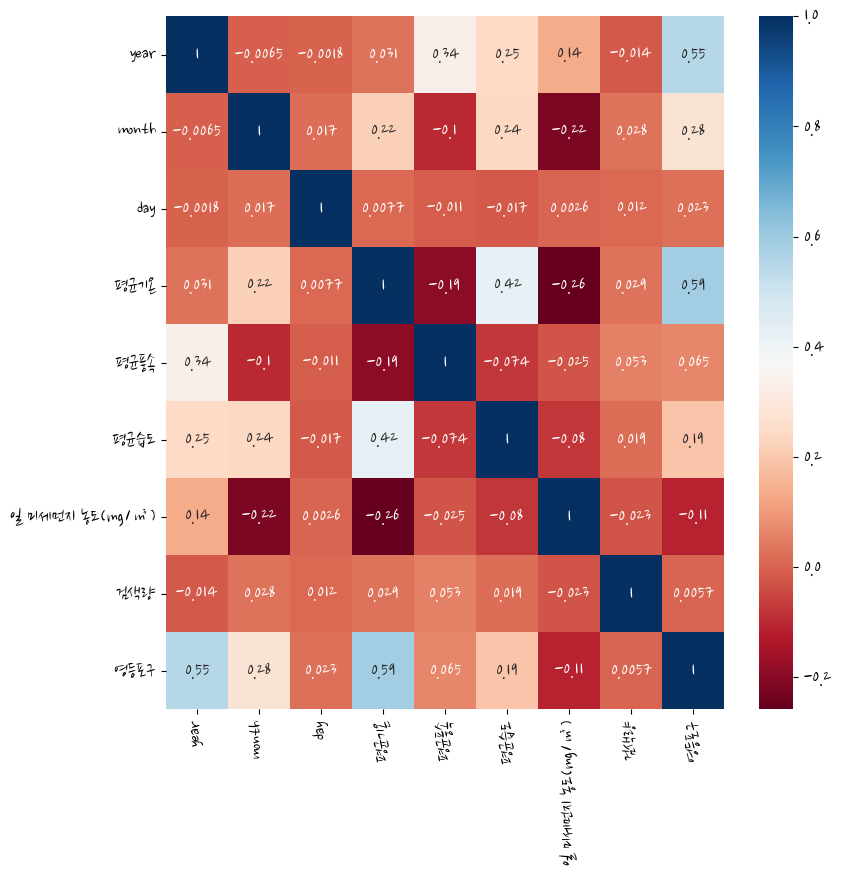

In [561]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(9, 9))
corr = test.corr()
sns.heatmap(corr, cmap='RdBu', annot=True)


## 불러오기

In [2]:
df= pd.read_csv('해정_2018-2021년_일자_자치구별_따릉이_이용건수.csv')


<AxesSubplot:xlabel='영등포구', ylabel='Count'>

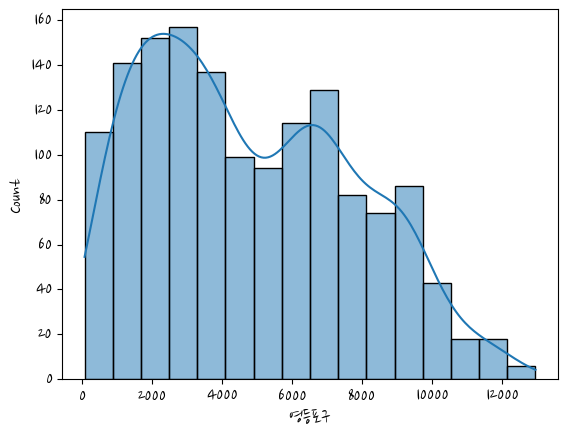

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

df['일시']=pd.to_datetime(df['일시'])

df['year'] = df.일시.apply(lambda x : x.year)
df['month'] = df.일시.apply(lambda x : x.month)
df['day'] = df.일시.apply(lambda x : x.day)

sns.histplot(df['영등포구'], kde=True)

### 모델돌리기

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [520]:
df = df[['일시','year',
       'month', 'day', '최저기온', '최고기온', '평균기온', '강수여부', '평균풍속', '평균습도', '일 미세먼지 농도(㎍/㎥)',
       '휴일여부', '요일', '계절', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구',
       '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '일합계', ]]

In [521]:
test1 = df[['year',
       'month', 'day', '최저기온', '최고기온', '평균기온', '강수여부', '평균풍속', '평균습도', '일 미세먼지 농도(㎍/㎥)',
       '휴일여부', '요일', '계절','영등포구']]

In [522]:
test1.fillna(test.mean(), inplace=True)
null_column_count= test1.isnull().sum()[test1.isnull().sum()>0] 
test1.dtypes[null_column_count.index]

Series([], dtype: object)

In [436]:
y = test1['영등포구']
X = test1.drop(columns=['영등포구'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')
# rmse 는 price에서 rmse만큼 차이가 난다.
# R2는 1에 가까울 수록 좋은 것


MSE: 2150018.1156769576, RMSE: 1466.2940072430758, R2: 0.7515706732695298


In [437]:
neg_mse_scores= cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)

neg_mse_scores # 회귀는 점수가 음수 형태로 나옴

np.mean(np.sqrt(neg_mse_scores * -1))
# 양수로 변경하고 루트 씌워서 rmse로 만들기
# 5개로 나눴을 때 모델 점수 값의 평균을 구함

1550.6650986388822

<function matplotlib.pyplot.show(close=None, block=None)>

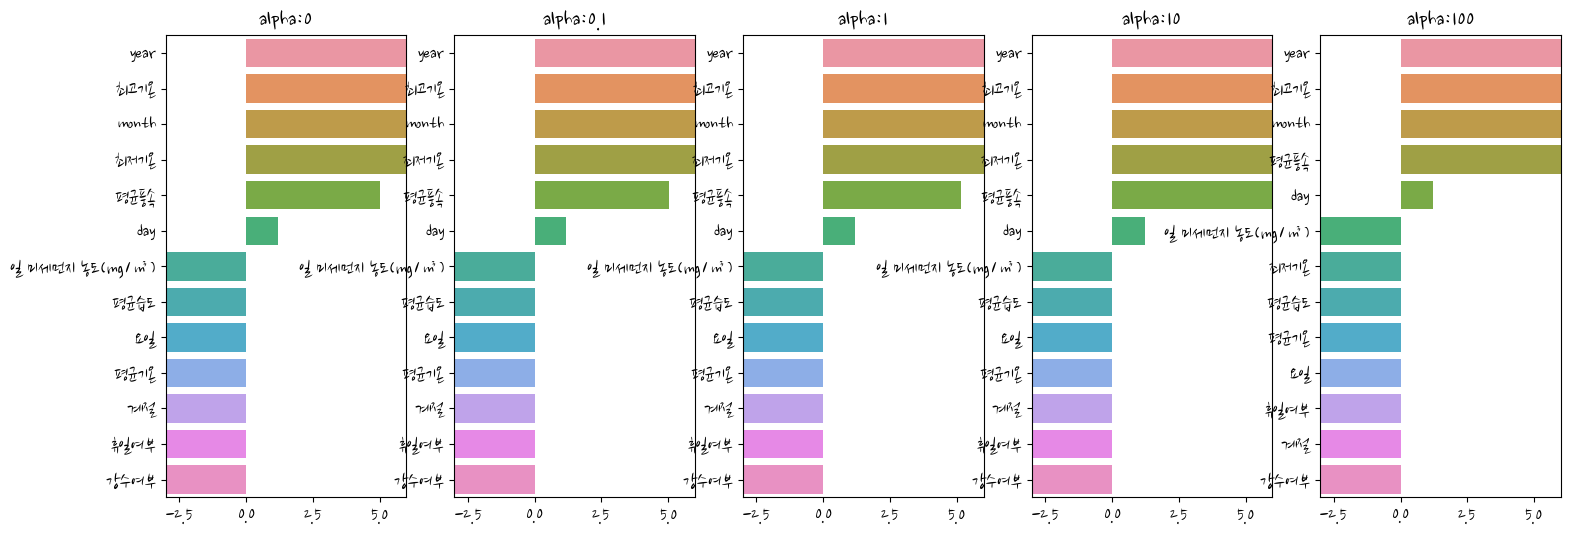

In [438]:
fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff = pd.Series(ridge.coef_, index=X.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
plt.show

In [439]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y, pred):
    rmse= rmse(y,pred)
    mae= 'rmse'
    print(f' RMSE : {rmse}, MAE:{mae}')

In [440]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

print('rmsle',np.sqrt(np.mean(squared_error)))
print('rmse',np.sqrt(mean_squared_error(y_test,pred)))
print('mae',mean_absolute_error(y_test, pred))


rmsle 0.4266598229390713
rmse 1466.2940072430758
mae 1146.7655867904898


In [441]:
def get_top_error_data(y_test,pred,n_top=5):
    result_df = pd.DataFrame(y_test.values, columns=['real'])
    result_df['pred']=np.round(pred)
    result_df['diff']= np.abs(result_df['real']- result_df['pred'])
    print(result_df.sort_values('diff', ascending=False)[:n_top])

In [442]:
get_top_error_data(y_test,pred,n_top=5)

       real    pred    diff
366  9667.0  5457.0  4210.0
319  2955.0  7061.0  4106.0
231  2245.0  6266.0  4021.0
189  2647.0  6609.0  3962.0
209  1236.0  5075.0  3839.0


---
### 로그추가

In [443]:
test1[['year', 'month', 'day','강수여부','휴일여부', '요일', '계절']]= test1[['year', 'month', 'day','강수여부','휴일여부', '요일', '계절']].astype('str')

In [444]:
features_index = test1.dtypes[test1.dtypes != 'object'].index

skew_features= test1[features_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features>1]

skew_features_top.sort_values(ascending=False)

일 미세먼지 농도(㎍/㎥)    3.246978
dtype: float64

In [445]:
test1[skew_features_top.index]= np.log1p(test1[skew_features_top.index])

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

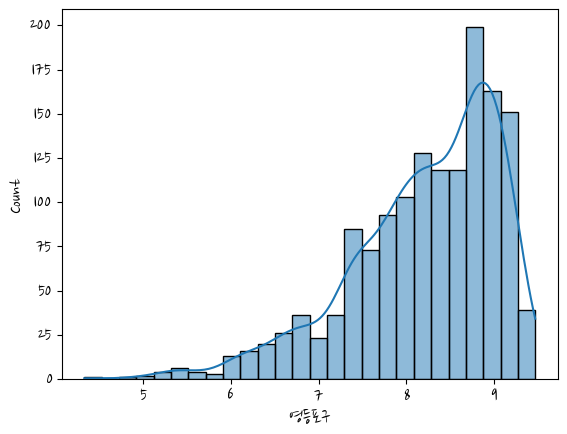

In [446]:
log_test = np.log1p(test1['영등포구'] +1)
sns.histplot(log_saleprice, kde=True)

Np.log(y+1)

In [447]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    R2 = r2_score(y_test, pred)
    print(model.__class__.__name__, '로그변환된 RMSE: ', np.round(rmse,3))
    print(f'R2: {r2_score(y_test, pred)}')
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [448]:
X = test1.drop(columns=['영등포구'])
y = log_test
test2 = pd.concat([X,y], axis=1)
test2

,year,month,day,최저기온,최고기온,평균기온,강수여부,평균풍속,평균습도,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,영등포구
0,2018,1,1,-5.1,3.8,-1.3,0,1.4,39.1,3.663562,1,0,4,6.045005
1,2018,1,2,-4.3,1.8,-1.8,0,1.8,42.0,3.496508,0,1,4,6.710523
2,2018,1,3,-7.1,-0.4,-4.7,0,2.2,42.3,3.496508,0,2,4,6.733402
3,2018,1,4,-8.7,-0.7,-4.7,0,1.4,43.0,3.713572,0,3,4,6.620073
4,2018,1,5,-5.6,1.6,-3.0,0,1.7,48.4,3.850148,0,4,4,6.778785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021,12,27,-12.9,-3.9,-7.6,0,1.7,60.9,3.526361,0,0,4,8.165648
1457,2021,12,28,-8.5,-0.9,-4.1,0,2.2,73.8,4.110874,0,1,4,8.346405
1458,2021,12,29,-3.8,5.9,0.4,0,2.6,72.9,4.262680,0,2,4,8.325306
1459,2021,12,30,-6.8,0.2,-3.9,0,3.3,48.5,3.433987,0,3,4,8.264621


In [449]:
X = test1.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [450]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')
# rmse 는 price에서 rmse만큼 차이가 난다.
# R2는 1에 가까울 수록 좋은 것"

MSE: 0.1346294348470172, RMSE: 0.3669188395912878, R2: 0.8058971936081362


In [451]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)



models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

MSE: 0.1346294348470172, RMSE: 0.3669188395912878, R2: 0.8058971936081362
LinearRegression 로그변환된 RMSE:  5583.517
R2: -44947703.07020702
Ridge 로그변환된 RMSE:  0.367
R2: 0.8058211945606604
Lasso 로그변환된 RMSE:  0.674
R2: 0.34581530945009065


[5583.517227901041, 0.3669906642953988, 0.673603433607798]

In [452]:
np.expm1(0.3669188395912878) # 로그한 결과 원상복귀

0.44328077710383923

In [453]:
def get_top_botton_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X.columns) #회귀계수값 시리즈로 만들기
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

In [454]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows = 1, ncols = 3)
    fig.tight_layout() # 여러개를 놓을때 배치를 맞춰서 해주는 함수
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_botton_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i_num].set_title(model.__class__.__name__ + ' Coefficient', size=25) #size는 글자크기
        axs[i_num].tick_params(axis = 'y', direction = 'in', pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y = coef_concat.index, ax = axs[i_num])

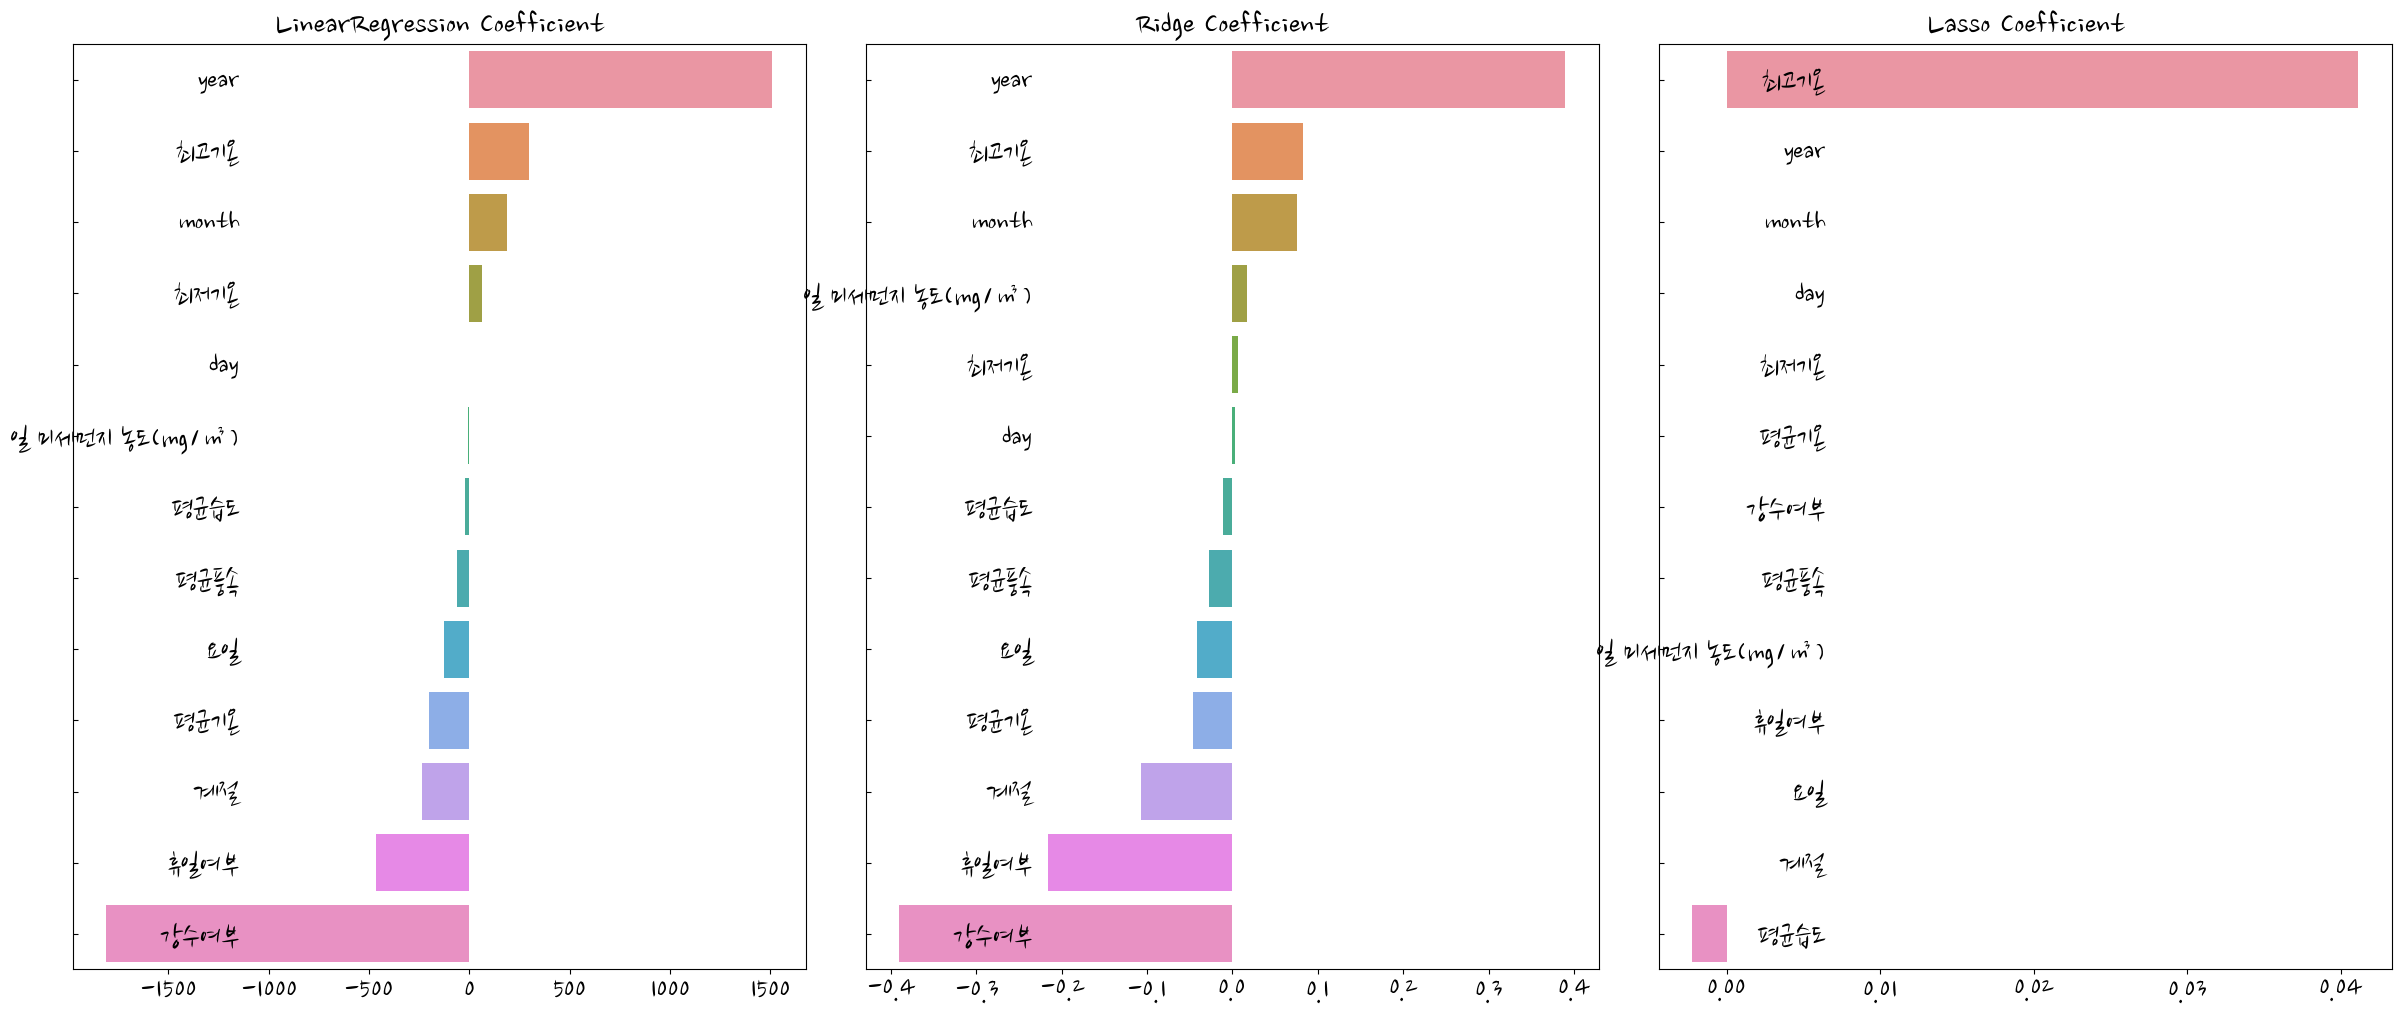

In [455]:
visualize_coefficient(models)

In [456]:
def get_avg_rmse_cv(models): #교차검증 cv 숫자
    for model in models : 
        rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv= 5))
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} cv rmse 값 리스트 : {np.round(rmse_list, 3)}')
        print(f'{model.__class__.__name__} cv 평균 rmse 값 : {np.round(rmse_avg, 3)}')

In [457]:
get_avg_rmse_cv(models)

LinearRegression cv rmse 값 리스트 : [0.527 0.357 0.373 0.433 0.495]
LinearRegression cv 평균 rmse 값 : 0.437
Ridge cv rmse 값 리스트 : [0.527 0.357 0.373 0.433 0.494]
Ridge cv 평균 rmse 값 : 0.437
Lasso cv rmse 값 리스트 : [1.094 0.534 0.534 0.639 0.844]
Lasso cv 평균 rmse 값 : 0.729


In [458]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, params, scoring = 'neg_mean_squared_error', cv =5) #마이너스값
    grid_model.fit(X,y)
    rmse = np.sqrt(-1 * grid_model.best_score_) #마이너스값 없애기
    print(f'{model.__class__.__name__} 5 cv시 최적 평균 rmse 값 : {np.round(rmse, 4)}, 최적 alpha 값 : {grid_model.best_params_}')

In [459]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, params, scoring = 'neg_mean_squared_error', cv =5) #마이너스값
    grid_model.fit(X,y)
    rmse = np.sqrt(-1 * grid_model.best_score_) #마이너스값 없애기
    print(f'{model.__class__.__name__} 5 cv시 최적 평균 rmse 값 : {np.round(rmse, 4)}, 최적 alpha 값 : {grid_model.best_params_}')

In [460]:
lasso_params = {
    'alpha': [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]
}
print_best_params(lasso_reg, lasso_params)

Lasso 5 cv시 최적 평균 rmse 값 : 0.4412, 최적 alpha 값 : {'alpha': 0.005}


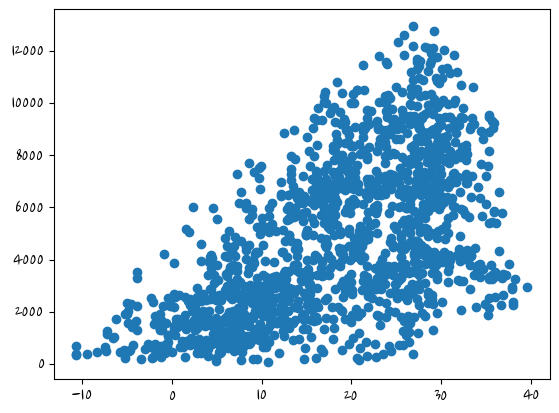

In [461]:
#이상치제거
plt.scatter(x = test['최고기온'], y=test['영등포구'])

In [462]:
test2 = pd.get_dummies(test2)
X = test2.drop(columns=['영등포구'])
y = test2['영등포구']

In [463]:
test1.shape

(1461, 14)

In [464]:
test2.shape

(1461, 69)

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [466]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그변환된 RMSE:  0.325
R2: 0.8474971003463257
Ridge 로그변환된 RMSE:  0.325
R2: 0.8477867707059344
Lasso 로그변환된 RMSE:  0.674
R2: 0.34581530945009065


[0.32523191380406996, 0.32492288746817477, 0.673603433607798]

In [467]:
get_top_botton_coef(lr_reg)

(강수여부_0       9.743819e+10
 강수여부_1       9.743819e+10
 month_6      5.025146e+10
 month_7      5.025146e+10
 month_8      5.025146e+10
 month_4      3.669786e+10
 month_5      3.669786e+10
 month_3      3.669786e+10
 year_2021    1.022599e+10
 year_2020    1.022599e+10
 dtype: float64,
 계절_3       -9.929508e+09
 month_12   -1.768284e+10
 month_2    -1.768284e+10
 month_1    -1.768284e+10
 계절_4       -2.631992e+10
 month_10   -3.407325e+10
 month_11   -3.407325e+10
 month_9    -3.407325e+10
 계절_1       -8.070062e+10
 계절_2       -9.425422e+10
 dtype: float64)

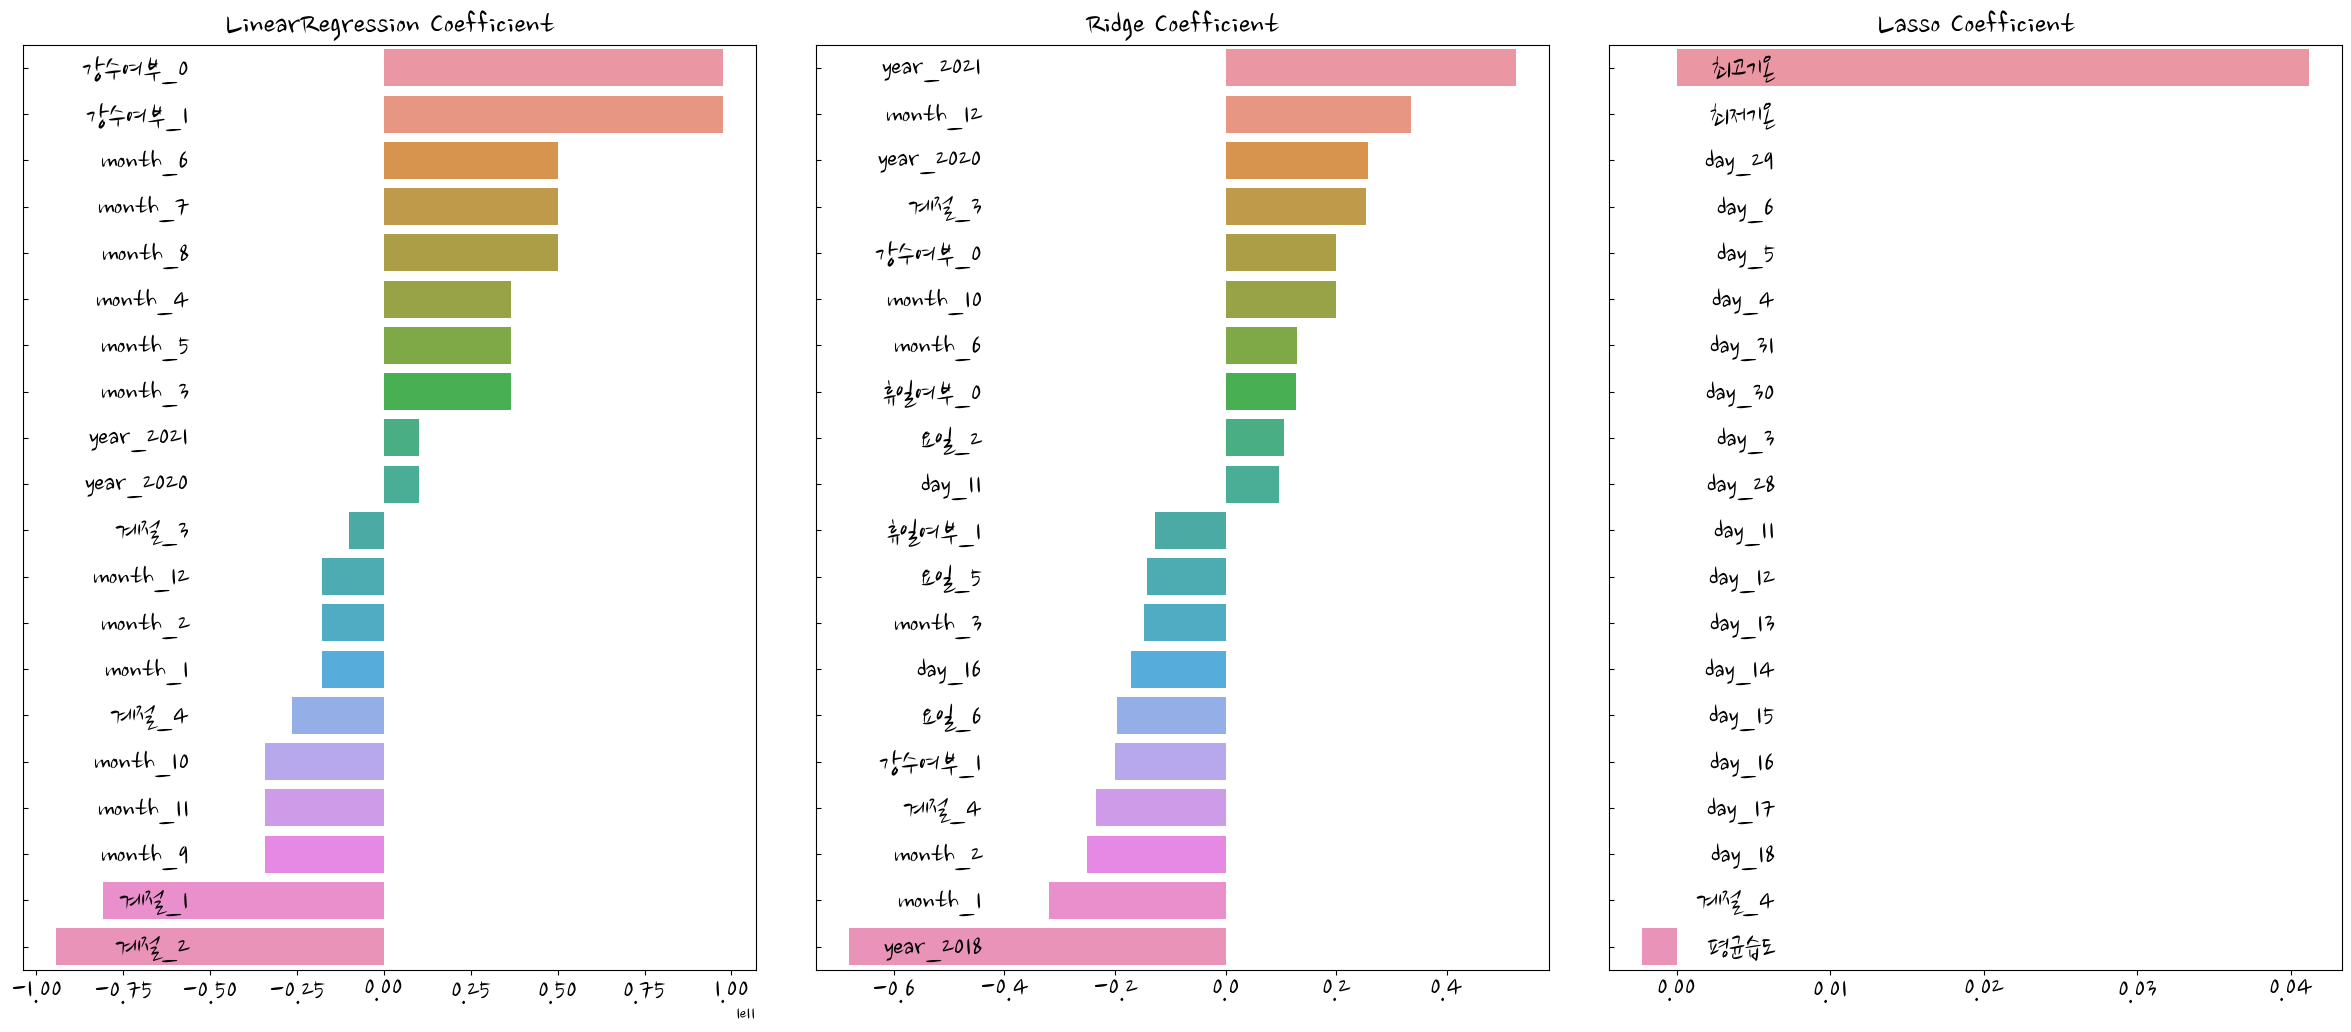

In [468]:
visualize_coefficient(models)

In [469]:
alphas = [0.1,1,10,100]
scale_methods = [(None, None),
                 ('Standard', None),
                 ('Standard',2),
                 ('MinMax', None),
                 ('MinMax',2),
                 ('Log', None)]
for scale_method in scale_methods:
    X_scaled_data = get_scaled_data(method=scale_method[0],p_degree=scale_method[1], input_data=X)
    print(f'{scale_method[0]}   {scale_method[1]}')
    get_linear_reg_eval('Ridge', params= alphas, X_data_n=X_scaled_data, y_target_n=y, return_coeff=False)

None   None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.409 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.407 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.399 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.487 
Standard   None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.409 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.409 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.408 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.408 
Standard   2
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1.398 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.062 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.825 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.652 
MinMax   None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.410 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.410 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.409 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.513 
MinMax   2
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.609 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.442 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.385 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.416 
Log   None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: nan 


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [470]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')
# rmse 는 price에서 rmse만큼 차이가 난다.
# R2는 1에 가까울 수록 좋은 것"

MSE: 0.10577579775665799, RMSE: 0.32523191380406996, R2: 0.8474971003463257


In [471]:
y_t= np.expm1(y_test)
p_t = np.expm1(pred)

for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}')

3612.9999999999977, 3045.76401339075
7810.000000000003, 9537.883402863563
9410.999999999993, 7002.331443698573
4173.999999999999, 2380.0189694780397
1100.9999999999995, 1537.0991461192891
596.0000000000001, 1618.8534195651673
2553.0000000000005, 1295.2967775281122
8704.0, 8852.445743018541
5704.000000000002, 6450.082168819046
2302.0000000000005, 3833.582322588992
5091.000000000003, 2606.2285836645215
6224.0, 5486.926553089758
7955.999999999996, 7040.477957461671
761.9999999999999, 1252.4841224901493
9192.000000000002, 11148.362197588724
4667.0, 2954.549354517944
11707.00000000001, 9983.468461597713
8565.999999999996, 10869.168330917331
9699.000000000004, 8826.1417877509
2573.000000000001, 2402.578013547921
7300.999999999994, 4148.969746682664
9872.000000000004, 14322.93065095323
6212.000000000005, 5640.09030106997
8302.999999999995, 11469.85439934162
7578.000000000002, 6501.670786477414
6156.999999999998, 4642.067347872689
5918.9999999999945, 4237.541432626026
7197.000000000004, 10529.

### 1차 모델 '일별 영등포구' 끝
---
### 2차 모델 '월별 인구수 추가'

In [472]:
peo = pd.read_csv('data_따릉/2018-2021년_년도_자치구별_주민등록인구.csv')

In [473]:
test1.columns

Index(['year', 'month', 'day', '최저기온', '최고기온', '평균기온', '강수여부', '평균풍속', '평균습도',
       '일 미세먼지 농도(㎍/㎥)', '휴일여부', '요일', '계절', '영등포구'],
      dtype='object')

In [474]:
test1['month']=test1['month'].astype('int')

In [475]:
test3 = pd.pivot_table(test1, values=['최저기온', '최고기온', '평균기온', '평균풍속', '평균습도',
       '일 미세먼지 농도(㎍/㎥)', '영등포구'], index=['year', 'month']).reset_index()

In [476]:
test3['계절'] = test3['month']

In [477]:
df = test3

In [478]:
df.loc[(df['계절']==3) | (df['계절']==4) | (df['계절']==5), '계절'] = '봄'
df.loc[(df['계절']==6) | (df['계절']==7) | (df['계절']==8), '계절'] = '여름'
df.loc[(df['계절']==9) | (df['계절']==10) | (df['계절']==11), '계절'] = '가을'
df.loc[(df['계절']==12) | (df['계절']==1) | (df['계절']==2), '계절'] = '겨울'
df.loc[(df['계절']=='봄'), '계절'] = 1
df.loc[(df['계절']=='여름'), '계절'] = 2
df.loc[(df['계절']=='가을'), '계절'] = 3
df.loc[(df['계절']=='겨울'), '계절'] = 4
df['계절'] = df.계절.astype(int)

In [479]:
peo.columns

Index(['년월', 'year', 'month', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구',
       '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object')

In [480]:
ple = peo.groupby(['year', 'month'])['영등포구'].mean().reset_index()

In [481]:
test3 = pd.concat([df, ple], axis =1)

In [482]:
test3.columns = ['year', 'month', '영등포구', '일 미세먼지 농도(㎍/㎥)', '최고기온', '최저기온', '평균기온',
       '평균습도', '평균풍속', '계절', 'year1', 'month1', '인구']

In [483]:
test3.drop(columns=['year1', 'month1'],inplace=True )

In [484]:
test3.head()

,year,month,영등포구,일 미세먼지 농도(㎍/㎥),최고기온,최저기온,평균기온,평균습도,평균풍속,계절,인구
0,2018,1,558.709677,3.703046,0.141935,-7.329032,-3.977419,48.032258,1.870968,4,167854.0
1,2018,2,623.571429,3.481396,3.282143,-5.871429,-1.646429,44.914286,2.178571,4,168381.0
2,2018,3,1476.258065,3.046218,13.596774,3.822581,8.080645,59.206452,1.919355,1,168784.0
3,2018,4,2332.233333,3.358839,18.513333,8.086667,12.986667,54.630000,2.003333,1,169083.0
4,2018,5,2942.387097,2.440495,23.290323,13.390323,18.167742,63.435484,1.719355,1,169220.0


In [485]:
test3[['year', 'month','계절']]= test3[['year', 'month','계절']].astype('str')

In [486]:
test3 = np.round(test3,2)

In [487]:
test3.isna().sum()

year              0
month             0
영등포구              0
일 미세먼지 농도(㎍/㎥)    0
최고기온              0
최저기온              0
평균기온              0
평균습도              0
평균풍속              0
계절                0
인구                0
dtype: int64

<AxesSubplot:>

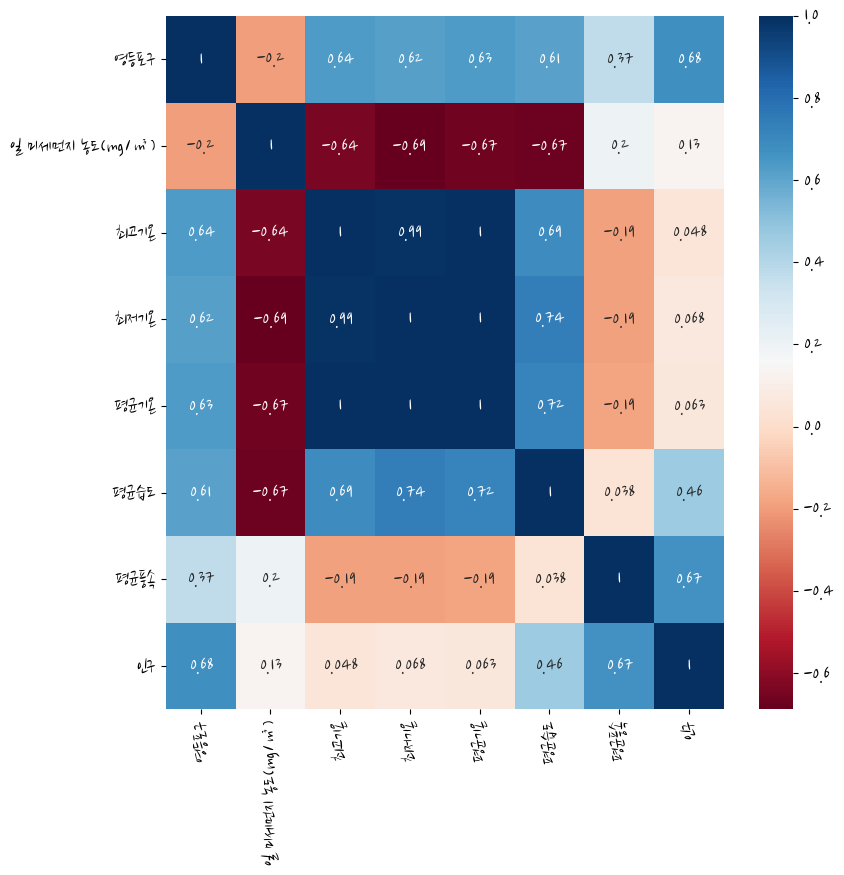

In [488]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(9, 9))
corr = test3.corr()
sns.heatmap(corr, cmap='RdBu', annot=True)

In [489]:
test3.fillna(test3.mean(), inplace=True)
null_column_count= test3.isnull().sum()[test3.isnull().sum()>0] 
test3.dtypes[null_column_count.index]

Series([], dtype: object)

In [490]:
test3 = pd.get_dummies(test3)
X = test3.drop(columns=['영등포구'])
y = test3['영등포구']

In [201]:
features_index = test5.dtypes[test5.dtypes != 'object'].index
skew_features= test5[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>1]
skew_features_top.sort_values(ascending=False)

일최심신적설            12.166799
일최심적설              8.847381
일강수량               5.001375
일 미세먼지 농도(㎍/㎥)     3.246978
최대순간풍속             1.400714
dtype: float64

In [502]:
test3[skew_features_top.index]= np.log1p(test3[skew_features_top.index])

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

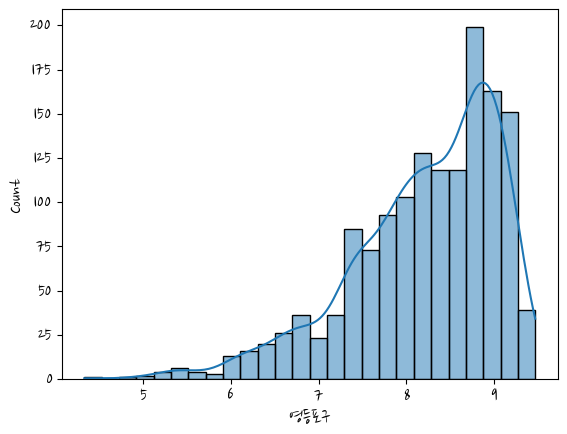

In [503]:
log_test = np.log1p(test3['영등포구'])
sns.histplot(log_saleprice, kde=True)

In [504]:
X = test3.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [505]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)



models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

MSE: 0.01979298005276962, RMSE: 0.14068752628705083, R2: 0.8961914239239239
LinearRegression 로그변환된 RMSE:  0.141
R2: 0.8961914239239239
Ridge 로그변환된 RMSE:  0.151
R2: 0.8806749397012048
Lasso 로그변환된 RMSE:  0.241
R2: 0.6952165605853997


[0.14068752628705083, 0.15083593084393435, 0.24106527709488831]

In [506]:
y_t= np.expm1(y_test)
p_t = np.expm1(pred)

for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}')

2998.809999999998, 3443.0339417500645
8480.420000000004, 10121.099871236793
2332.2300000000005, 3077.4835778402844
2942.389999999999, 2735.295528627202
7299.7400000000025, 6707.973402943304
4330.129999999997, 5208.1226002592675
4528.839999999999, 4015.979391284748
7093.7100000000055, 6565.989542681136
7694.699999999997, 8097.60398240691
5882.159999999994, 5681.800238140941


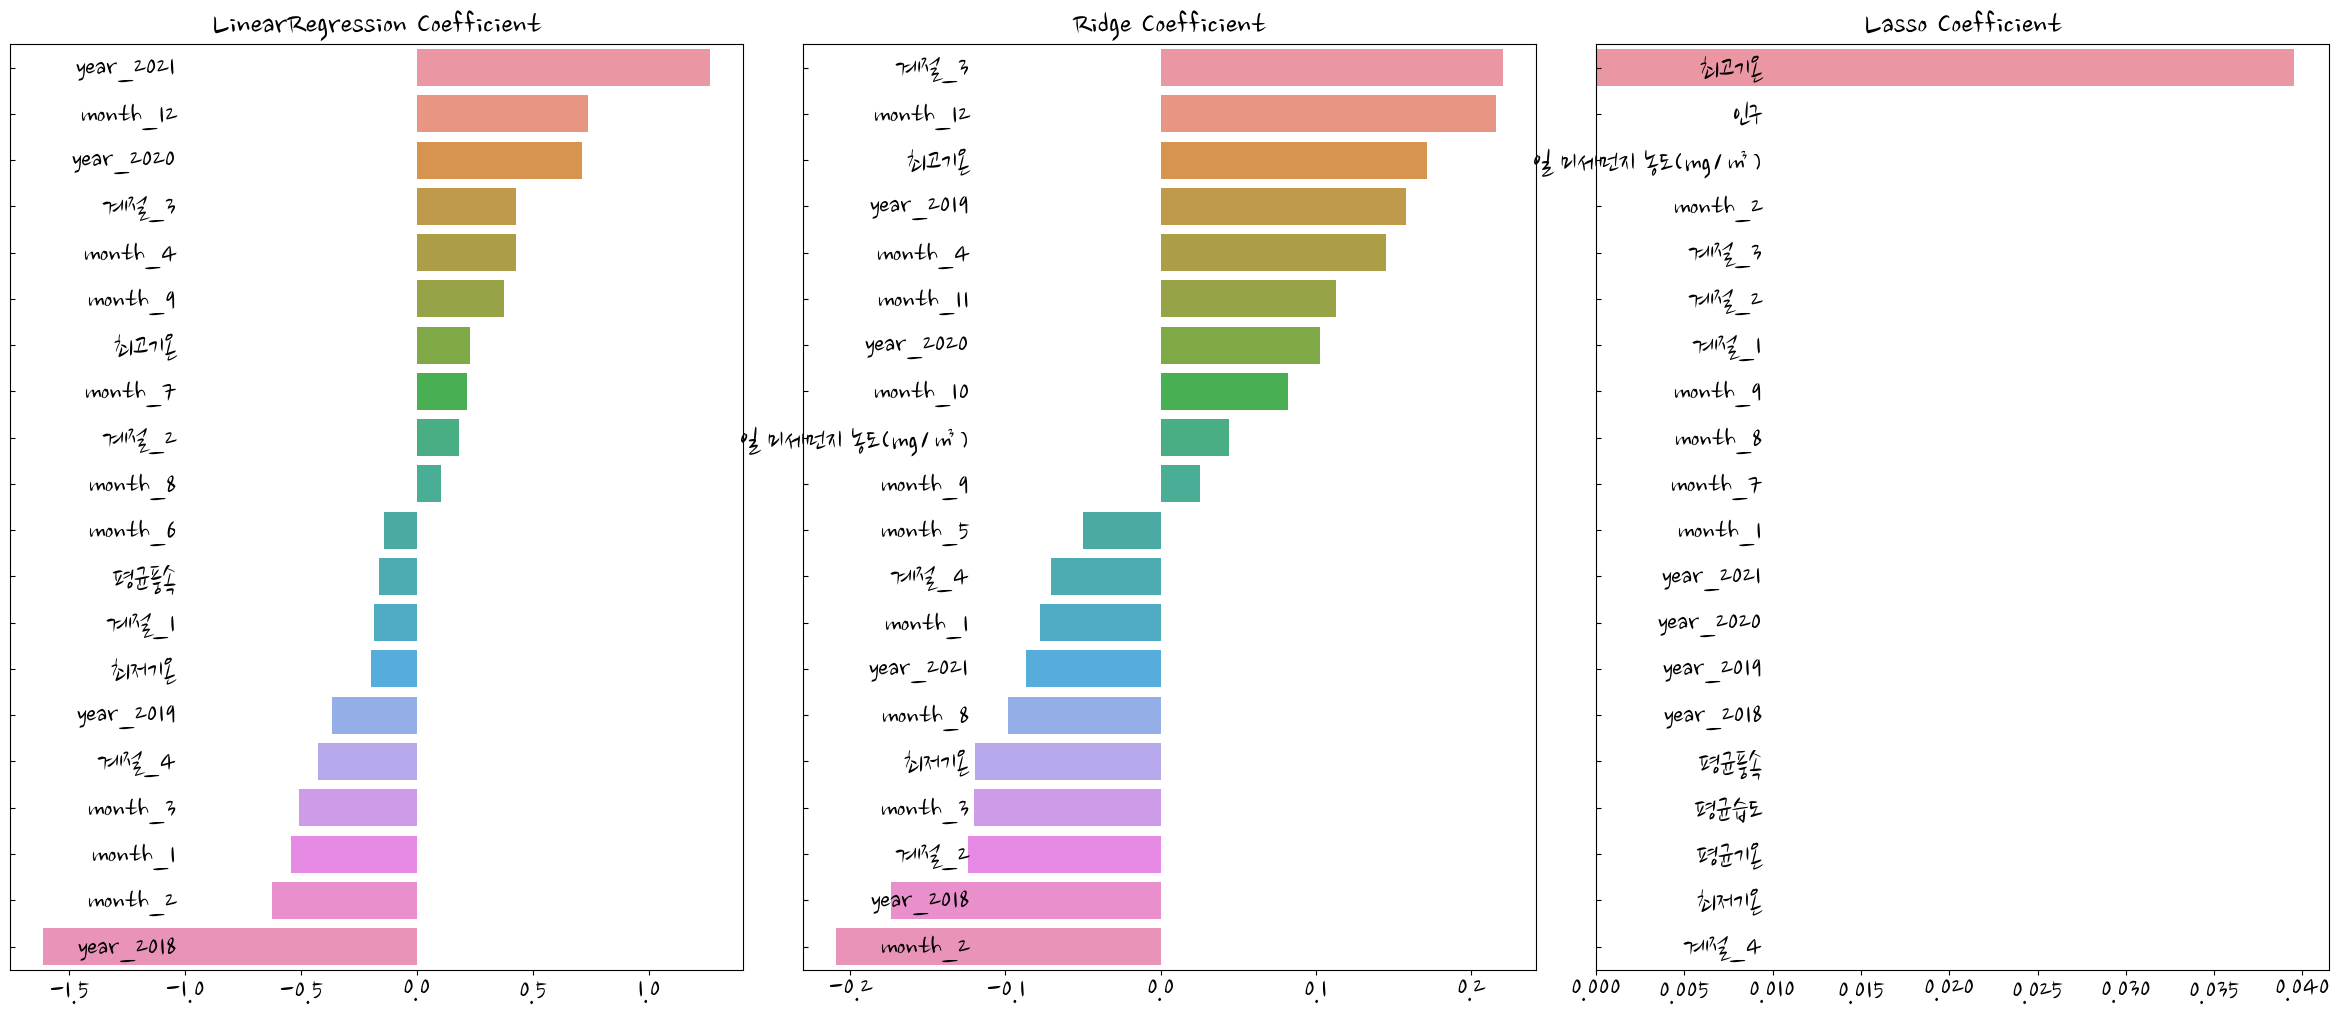

In [507]:
visualize_coefficient(models)

In [508]:
alphas=[0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    print(np.mean(np.sqrt(neg_mse_scores * -1)))
    
# alpha가 100일때가 가장 좋은 점수

0.19819027230558875
0.22999568300051854
0.23166158554156913
0.27042072518237903
0.3094960765537883


<function matplotlib.pyplot.show(close=None, block=None)>

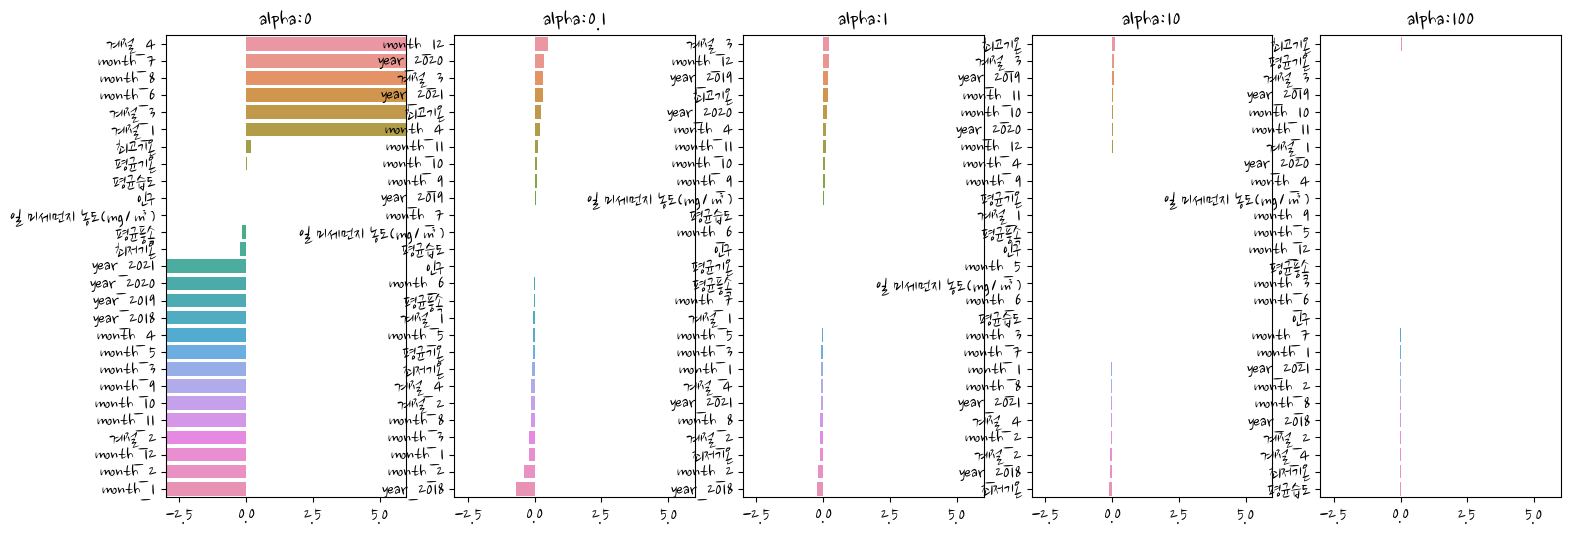

In [509]:
fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff = pd.Series(ridge.coef_, index=X.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
plt.show

In [510]:
ridge_alphas = [0,0.1,1,10,100]
sort_columns = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
계절_4,2.018288e+10,-0.129662,-0.099345,-0.047267,-0.009619
month_7,1.028190e+10,0.028648,-0.005106,-0.013281,-0.003249
month_8,1.028190e+10,-0.147667,-0.121555,-0.036913,-0.006157
month_6,1.028190e+10,-0.015003,0.002621,-0.002074,0.000119
계절_3,4.000118e+09,0.318454,0.232091,0.092183,0.014348
계절_1,3.872946e+09,-0.054770,-0.008705,0.007352,0.004558
최고기온,2.047490e-01,0.219332,0.175526,0.128864,0.048357
평균기온,2.473086e-02,-0.063998,-0.004362,0.012137,0.017264
평균습도,8.536471e-03,0.005804,0.003461,-0.005444,-0.016414
인구,-3.917960e-05,0.000034,0.000062,0.000070,0.000075


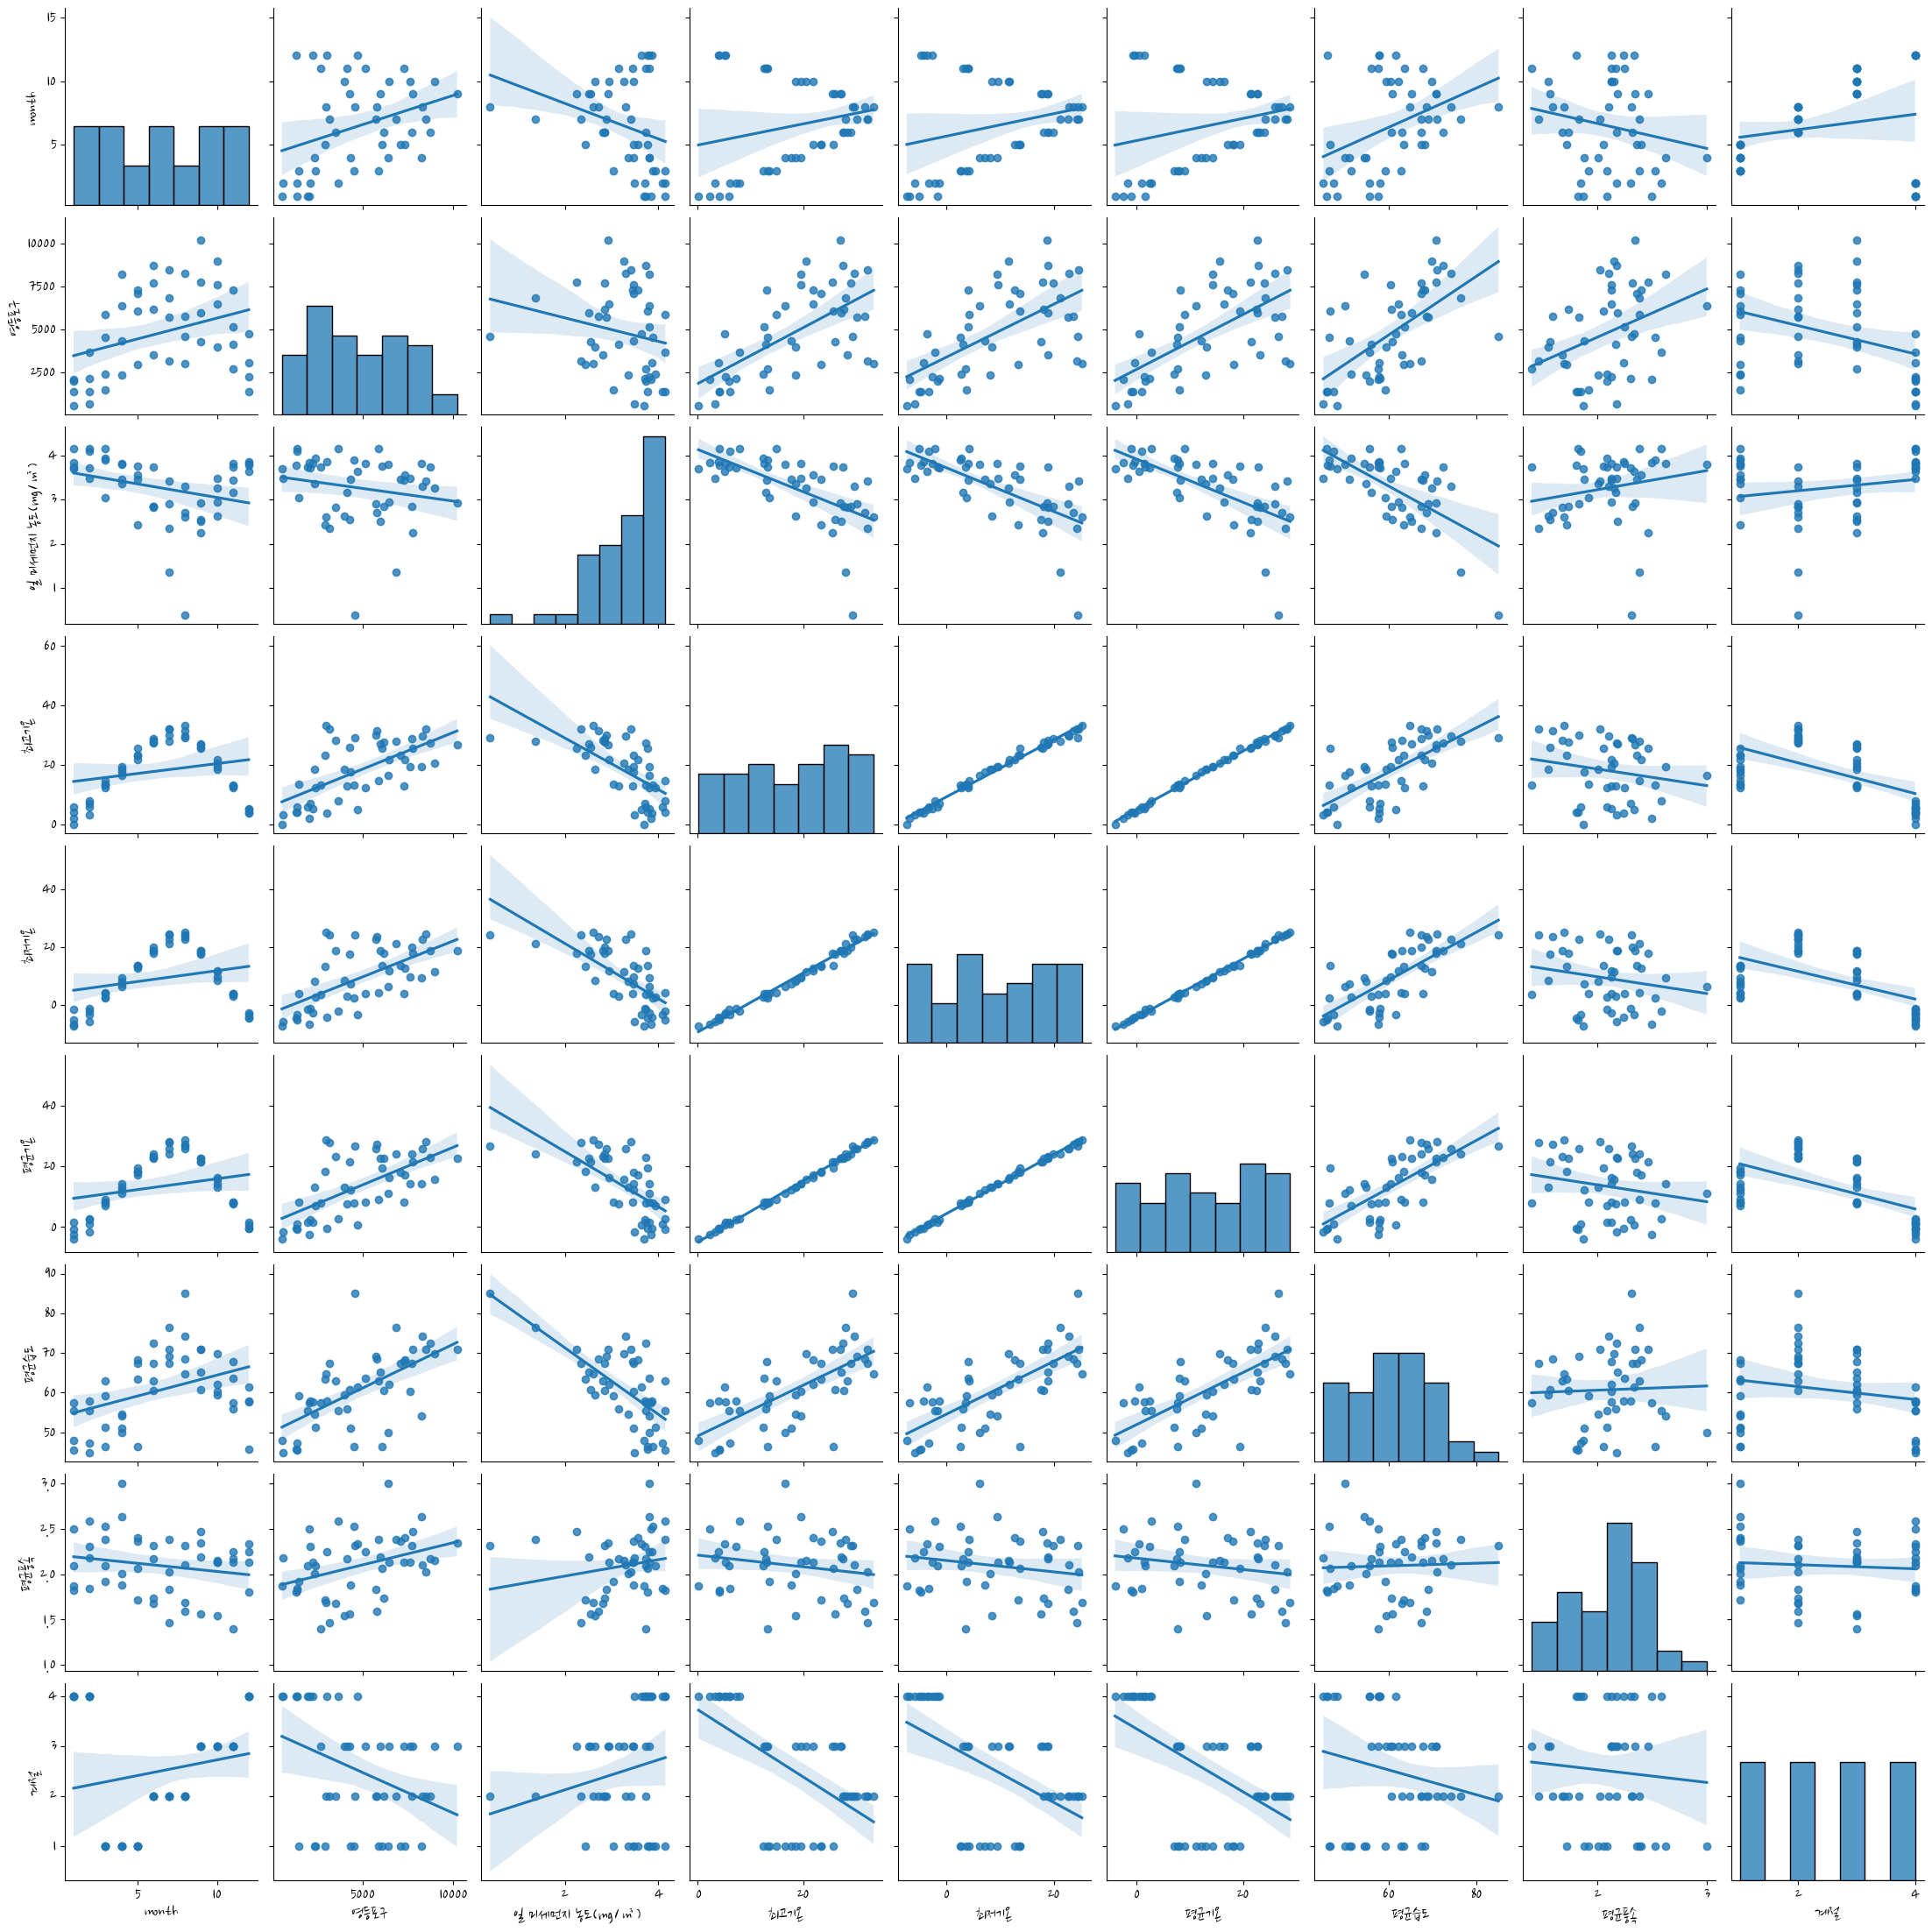

In [512]:
sns.pairplot(df, kind='reg')

### 분류도 해볼까

In [523]:
test1

,year,month,day,최저기온,최고기온,평균기온,강수여부,평균풍속,평균습도,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,영등포구
0,2018,1,1,-5.1,3.8,-1.3,0,1.4,39.1,38.0,1,0,4,421.0
1,2018,1,2,-4.3,1.8,-1.8,0,1.8,42.0,32.0,0,1,4,820.0
2,2018,1,3,-7.1,-0.4,-4.7,0,2.2,42.3,32.0,0,2,4,839.0
3,2018,1,4,-8.7,-0.7,-4.7,0,1.4,43.0,40.0,0,3,4,749.0
4,2018,1,5,-5.6,1.6,-3.0,0,1.7,48.4,46.0,0,4,4,878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021,12,27,-12.9,-3.9,-7.6,0,1.7,60.9,33.0,0,0,4,3517.0
1457,2021,12,28,-8.5,-0.9,-4.1,0,2.2,73.8,60.0,0,1,4,4214.0
1458,2021,12,29,-3.8,5.9,0.4,0,2.6,72.9,70.0,0,2,4,4126.0
1459,2021,12,30,-6.8,0.2,-3.9,0,3.3,48.5,30.0,0,3,4,3883.0


In [525]:
print(test1['영등포구'].min())
print(test1['영등포구'].max())
test1['영등포구'].mean()

75.0
12961.0


4812.030136986302

In [ ]:
bound = pd.DataFrame()
for i in test1['영등포구']:
    if i 

### 따릉이 변수 많게

In [35]:
df = pd.read_csv('2018-2021년_2_자치구별_따릉이_이용건수.csv')

In [36]:
df.drop(columns='Unnamed: 0', inplace=True) 

df['일시']=pd.to_datetime(df['일시']) # 날짜형식으로 변경

df['year'] = df.일시.apply(lambda x : x.year)
df['month'] = df.일시.apply(lambda x : x.month)
df['day'] = df.일시.apply(lambda x : x.day)

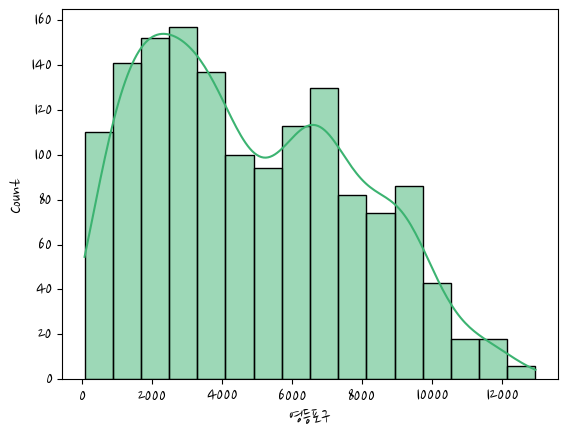

In [41]:
sns.histplot(df['영등포구'], kde=True, color='mediumseagreen') # 정규분포 확인

plt.savefig('myfigure.png', transparent = True)


In [529]:
df.columns

Index(['일시', '평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
       '요일', '계절', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '일합계', 'year', 'month',
       'day'],
      dtype='object')

In [43]:
test5 = df[['평균기온', '최저기온', '최고기온', '일강수량', '최대순간풍속', '최대순간풍속풍향', '최대풍속',
       '최대풍속풍향', '평균풍속', '최다풍향', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균증기압',
       '평균전운량', '평균중하층운량', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부',
      '요일', '계절', 'year', 'month',
       'day', '영등포구']] #확인할 컬럼 추출

In [555]:
test5

,평균기온,최저기온,최고기온,일강수량,최대순간풍속,최대순간풍속풍향,최대풍속,최대풍속풍향,평균풍속,최다풍향,...,day_29,day_3,day_30,day_31,day_4,day_5,day_6,day_7,day_8,day_9
0,-1.3,-5.1,3.8,0.000000,2.079442,320,3.8,290,1.4,290,...,0,0,0,0,0,0,0,0,0,0
1,-1.8,-4.3,1.8,0.000000,2.251292,270,4.9,290,1.8,290,...,0,0,0,0,0,0,0,0,0,0
2,-4.7,-7.1,-0.4,0.000000,2.028148,320,3.5,270,2.2,290,...,0,1,0,0,0,0,0,0,0,0
3,-4.7,-8.7,-0.7,0.000000,1.916923,320,3.5,320,1.4,290,...,0,0,0,0,1,0,0,0,0,0
4,-3.0,-5.6,1.6,0.000000,2.197225,250,3.6,270,1.7,290,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-7.6,-12.9,-3.9,0.000000,1.871802,340,3.1,20,1.7,50,...,0,0,0,0,0,0,0,0,0,0
1457,-4.1,-8.5,-0.9,0.000000,1.774952,50,3.1,50,2.2,50,...,0,0,0,0,0,0,0,0,0,0
1458,0.4,-3.8,5.9,0.182322,2.468100,270,5.9,270,2.6,50,...,1,0,0,0,0,0,0,0,0,0
1459,-3.9,-6.8,0.2,0.000000,2.587764,320,6.6,290,3.3,270,...,0,0,1,0,0,0,0,0,0,0


In [535]:
test5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   평균기온            1461 non-null   float64
 1   최저기온            1461 non-null   float64
 2   최고기온            1461 non-null   float64
 3   일강수량            1461 non-null   float64
 4   최대순간풍속          1461 non-null   float64
 5   최대순간풍속풍향        1461 non-null   int64  
 6   최대풍속            1461 non-null   float64
 7   최대풍속풍향          1461 non-null   int64  
 8   평균풍속            1461 non-null   float64
 9   최다풍향            1461 non-null   int64  
 10  평균이슬점온도         1461 non-null   float64
 11  최소상대습도          1461 non-null   int64  
 12  평균상대습도          1461 non-null   float64
 13  평균증기압           1461 non-null   float64
 14  평균전운량           1461 non-null   float64
 15  평균중하층운량         1461 non-null   float64
 16  일최심적설           1461 non-null   float64
 17  일최심신적설          1461 non-null   f

#### 1차 - 전처리 없이 돌리기

In [546]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [536]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [538]:
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)



models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

MSE: 1708648.867690038, RMSE: 1307.1529626214515, R2: 0.8070599411787904
LinearRegression 로그변환된 RMSE:  1307.153
R2: 0.8070599411787904
Ridge 로그변환된 RMSE:  1307.282
R2: 0.8070217779441946
Lasso 로그변환된 RMSE:  1307.098
R2: 0.8070760937435184


[1307.1529626214515, 1307.2822326105647, 1307.098245330266]

#### 2차 원앤핫 + 로그

In [217]:
# 계산처리 안할거 문자로 바꾸기
dd[[ '강수여부','휴일여부','요일', '계절',  'month','day',]]= dd[[ '강수여부','휴일여부','요일', '계절',  'month','day']].astype('str') 

In [207]:
#왜곡도 확인
features_index = dd.dtypes[dd.dtypes != 'object'].index
skew_features= dd[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>1]
skew_features_top.sort_values(ascending=False)


일최심신적설            12.166799
일최심적설              8.847381
일강수량               5.001375
일 미세먼지 농도(㎍/㎥)     3.246978
풍속                 1.201223
총생활인구수             1.172244
dtype: float64

In [541]:

dd[skew_features_top.index]= np.log1p(dd[skew_features_top.index])


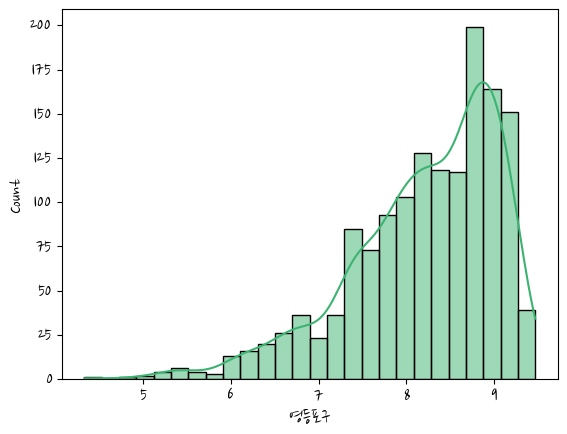

In [45]:
# y값 정규분포로 변환
log_test = np.log1p(test5['영등포구'])
sns.histplot(log_test, kde=True, color='mediumseagreen') # 정규분포 확인

plt.savefig('myfigure.png', transparent = True)

In [213]:
df = pd.read_csv('2018_2021_전처리_최종.csv')

In [219]:
dd.columns

Index(['총생활인구수', '기온', '기압', '풍속', '운량', '일강수량', '최대순간풍속풍향', '최대풍속풍향', '평균풍속',
       '최다풍향', '일최심적설', '일최심신적설', '일 미세먼지 농도(㎍/㎥)', '영등포구', '강수여부_0.0',
       '강수여부_1.0', '휴일여부_0', '휴일여부_1', '요일_0', '요일_1', '요일_2', '요일_3', '요일_4',
       '요일_5', '요일_6', '계절_1', '계절_2', '계절_3', '계절_4', 'month_1', 'month_10',
       'month_11', 'month_12', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'day_1', 'day_10', 'day_11',
       'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18',
       'day_19', 'day_2', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_3', 'day_30',
       'day_31', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9'],
      dtype='object')

In [221]:
df.shape

(1461, 20)

In [220]:
dd.shape

(1461, 72)

In [218]:
# 문자열 치환 원앤핫인코딩

dd = pd.get_dummies(dd)

X = dd.drop(columns=['영등포구'])
y = log_test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [544]:
# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)



models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

MSE: 0.07280745805695467, RMSE: 0.2698285716097439, R2: 0.8950294045936424
LinearRegression 로그변환된 RMSE:  0.27
R2: 0.8950294045936424
Ridge 로그변환된 RMSE:  0.269
R2: 0.8958494585535265
Lasso 로그변환된 RMSE:  0.675
R2: 0.3421363087927579


[0.2698285716097439, 0.26877252422471865, 0.6754948819014175]

In [545]:
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)

for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}')

3612.9999999999977, 3711.7609093901465
7810.000000000003, 9425.79679919781
9410.999999999993, 7986.496480061052
4173.999999999999, 3773.6628309899957
1100.9999999999995, 768.0781756169612
596.0000000000001, 1238.6263337924988
2553.0000000000005, 1588.591005334685
8704.0, 8917.43693279598
5704.000000000002, 6793.023831648377
2302.0000000000005, 2831.181975343237
5091.000000000003, 2384.788839687192
6224.0, 5287.4631197633125
7955.999999999996, 7490.733705638539
761.9999999999999, 1087.8729660528968
9192.000000000002, 11708.390661804144
4667.0, 3930.4240852184835
11707.00000000001, 10112.498359035515
8565.999999999996, 11256.946647082765
9699.000000000004, 7812.011776220526
2573.000000000001, 2162.532797061165
7300.999999999994, 5731.569966957505
9872.000000000004, 15327.367416393987
6212.000000000005, 5946.698748765513
8302.999999999995, 10446.046370985954
7578.000000000002, 6769.325156433893
6156.999999999998, 4820.694673700492
5918.9999999999945, 6298.5850200372615
7197.000000000004, 

## 시간별 처리

In [52]:
df= pd.read_csv('data_따릉/2018-2021년 1-12월 데이터.csv', index_col=0)

C:\Users\user\AppData\Local\Temp\ipykernel_17060\4232434066.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('data_따릉/2018-2021년 1-12월 데이터.csv', index_col=0)


In [5]:
df.sample(5)

,대여시간,대여소번호,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여일자
5152494,9,233,NaN,20대,1.0,20.33,0.16,703.28,5.0,2021-06-04
4196338,12,207,NaN,30대,1.0,0.00,0.00,0.00,31.0,2020-09-27
8417808,8,268,NaN,40대,1.0,253.52,2.03,8770.00,50.0,2021-05-29
7801028,13,279,NaN,30대,1.0,70.40,0.82,3555.74,26.0,2020-11-26
8374643,18,230,NaN,30대,2.0,212.51,1.41,6098.26,78.0,2021-05-21


In [9]:
df.tail()

,대여시간,대여소번호,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여일자
13023406,23,252,M,20대,1.0,50.55,0.41,1748.78,8.0,2021-12-31
13023407,23,264,M,30대,1.0,42.41,0.35,1530.00,10.0,2021-12-31
13023408,23,3220,M,40대,1.0,15.72,0.10,441.09,3.0,2021-12-31
13023409,23,298,M,50대,1.0,178.79,1.40,6020.00,32.0,2021-12-31
13023410,23,4561,M,50대,1.0,22.95,0.19,840.00,4.0,2021-12-31


In [53]:
df = df[['대여일자','대여시간', '대여소번호', '성별', '연령대코드', '이용건수', '운동량', '탄소량', '이동거리', '사용시간',
       ]]

In [54]:
df['대여일자'] = df['대여일자'].str.replace('00:00:00','')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13023411 entries, 0 to 13023410
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   성별      object 
 4   연령대코드   object 
 5   이용건수    float64
 6   운동량     object 
 7   탄소량     object 
 8   이동거리    float64
 9   사용시간    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.1+ GB


In [55]:
# 연령대별 널값 바꾸기
df['연령대코드'].value_counts()

20대       4883719
30대       3652978
40대       2238715
50대       1269042
~10대       613991
60대        303073
70대~        61875
1              12
317.59          3
2               3
Name: 연령대코드, dtype: int64

In [56]:
df['연령대코드']= df['연령대코드'].str.replace('317.59','20대')
df['연령대코드']= df['연령대코드'].str.replace('2','20대')
df['연령대코드']= df['연령대코드'].str.replace('1','20대')

C:\Users\user\AppData\Local\Temp\ipykernel_17060\761836838.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['연령대코드']= df['연령대코드'].str.replace('317.59','20대')


In [57]:
df['연령대코드']= df['연령대코드'].str.replace('~20대0대','10대')
df['연령대코드']= df['연령대코드'].str.replace('20대0대','20대')
df['연령대코드']= df['연령대코드'].str.replace('~','')

In [58]:
# 성별 널값 너무 많아서 drop
df.drop(columns='성별', inplace=True)

# 의미없는 자료 drop
df.drop(columns='대여소번호', inplace=True)
df.drop(columns='이용건수', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13023411 entries, 0 to 13023410
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   연령대코드   object 
 3   운동량     object 
 4   탄소량     object 
 5   이동거리    float64
 6   사용시간    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 794.9+ MB


In [14]:
tt = df.groupby('대여시간')['사용시간'].sum().reset_index()

In [15]:
age = df.groupby('연령대코드')['이동거리'].sum().reset_index()

<AxesSubplot:xlabel='연령대코드', ylabel='이동거리'>

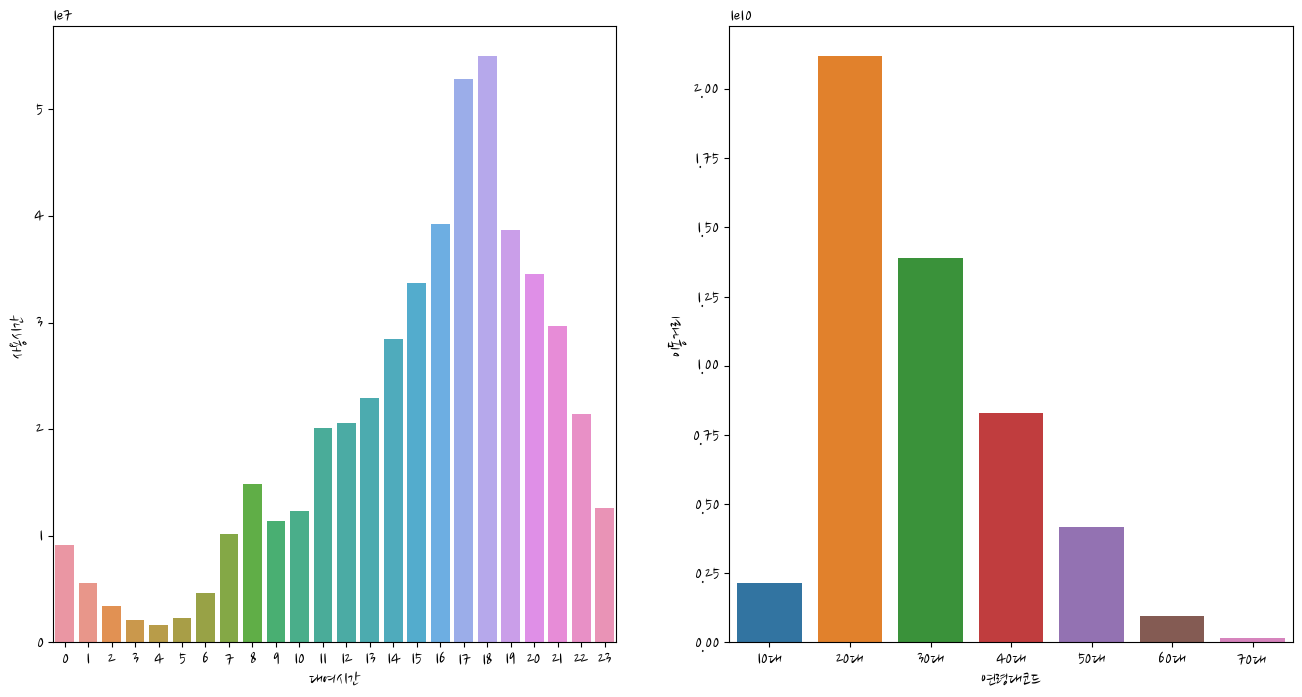

In [16]:
fig, axs = plt.subplots(figsize=(16, 8), ncols = 2, nrows = 1)
sns.barplot(data=tt, x='대여시간', y = '사용시간', ax = axs[0])
sns.barplot(data=age, x='연령대코드', y = '이동거리', ax = axs[1])
  

In [18]:
from matplotlib import font_manager

In [23]:
for font in font_manager.fontManager.ttflist:
    if 'EF' in font.name:
        print(font.name, font.fname)

EF_???? C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\EF_Diary.ttf


<AxesSubplot:xlabel='대여시간', ylabel='사용시간'>

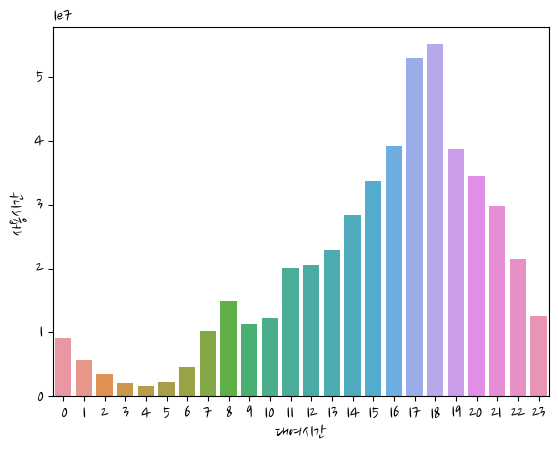

In [118]:
sns.barplot(data=tt, x='대여시간', y = '사용시간')

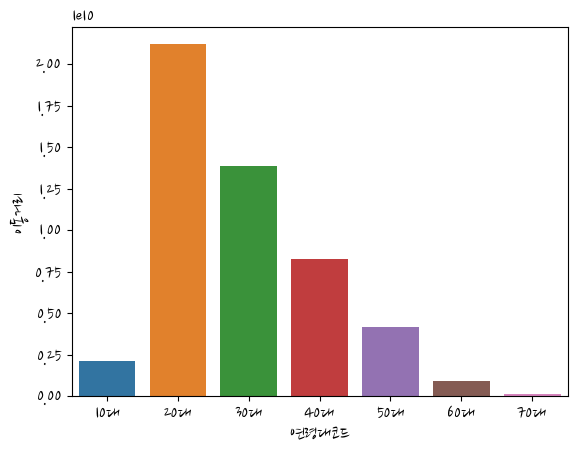

In [120]:
sns.barplot(data=age, x='연령대코드', y = '이동거리')
plt.savefig('myfigure.png', transparent = True)


## plt.savefig('myfigure.pdf', transparent = True)

In [65]:
# 운동량, 탄소량 type 바꾸기

df['운동량'].value_counts()

0.00       4331110
21.62         8227
15.44         7650
23.17         7432
24.71         6781
            ...   
1162.90          1
7176.94          1
1650.23          1
2013.96          1
1246.65          1
Name: 운동량, Length: 141869, dtype: int64

In [66]:
df['탄소량'].value_counts()

0.00      4340167
0.16       152754
0.19       137409
0.23       134073
0.14       128124
           ...   
65.35           1
95.26           1
41.19           1
54.16           1
108.44          1
Name: 탄소량, Length: 6035, dtype: int64

In [60]:
df['탄소량']=df['탄소량'].replace("\\N",'0')

In [61]:
df['운동량']=df['운동량'].replace("\\N",'0')

In [62]:
df['탄소량'] = df['탄소량'].astype('float')

In [63]:
df['운동량'] = df['운동량'].astype('float')

In [64]:
df['대여일자']= pd.to_datetime(df['대여일자'])

In [67]:
df['year'] = df.대여일자.apply(lambda x : x.year)
df['month'] = df.대여일자.apply(lambda x : x.month)
df['day'] = df.대여일자.apply(lambda x : x.day)

In [68]:
df18 = df[df['year']==2018]
df19 = df[df['year']==2019]
df20 = df[df['year']==2020]
df21 = df[df['year']==2021]

In [69]:
df18.columns = ['일시', '시간대구분', '연령대코드', '운동량', '탄소량', '이동거리', '사용시간', 'year', 'month',
       'day']

In [70]:
time = pd.read_csv('2018년_시간별_영등포_유동인구.csv')

In [71]:
time.columns 

Index(['일시', '시간대구분', '자치구코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수',
       '여자70세이상생활인구수'],
      dtype='object')

In [72]:
time['10대'] = time[['남자10세부터14세생활인구수','남자15세부터19세생활인구수', '여자10세부터14세생활인구수', '여자15세부터19세생활인구수']].sum(axis=1)

In [73]:

time['20대'] = time[['남자20세부터24세생활인구수', '남자25세부터29세생활인구수', '여자20세부터24세생활인구수','여자25세부터29세생활인구수']].sum(axis=1)
time['30대'] = time[['남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수']].sum(axis=1)
time['40대'] = time[['남자40세부터44세생활인구수','남자45세부터49세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수']].sum(axis=1)
time['50대'] = time[['남자50세부터54세생활인구수', '남자55세부터59세생활인구수', '여자50세부터54세생활인구수', '여자55세부터59세생활인구수']].sum(axis=1)
time['60대'] = time[['남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수']].sum(axis=1)
time['70대'] = time[['남자70세이상생활인구수','여자70세이상생활인구수']].sum(axis=1)

In [75]:
pl = time[['일시', '시간대구분','10대', '20대', '30대', '40대', '50대', '60대',
       '70대']]

In [76]:
pl['일시']= pd.to_datetime(pl['일시'])

C:\Users\user\AppData\Local\Temp\ipykernel_17060\3375155403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl['일시']= pd.to_datetime(pl['일시'])


In [77]:
pl.columns = ['일시', '시간대구분', '10대', '20대', '30대', '40대', '50대',
       '60대', '70대']

In [78]:
pll= pl.melt(id_vars=['일시','시간대구분'], var_name='연령대코드',value_name='생활인구수')

In [79]:
pl

,일시,시간대구분,10대,20대,30대,40대,50대,60대,70대
0,2018-01-01,0,28204.5758,65149.0357,77000.4481,67082.3382,65410.9337,52210.1868,51831.6925
1,2018-01-01,1,27904.8964,64405.6608,75348.4328,65329.9248,63549.1479,49501.6941,49740.2610
2,2018-01-01,2,27589.3025,62701.1608,74365.0434,64532.2418,62861.2998,49218.7999,49498.0288
3,2018-01-01,3,27509.2221,61896.3891,73868.8252,64450.9589,62910.8452,49184.6240,49287.5248
4,2018-01-01,4,27534.5948,61803.6657,73661.5540,64522.8871,62790.2691,49188.0241,49363.1798
...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,19,28893.1851,78672.5868,92386.7848,80363.1962,73389.3953,55855.5584,52917.1825
8756,2018-12-31,20,28679.4990,75149.0090,88188.7086,76376.9389,70125.4725,54917.2878,52556.6361
8757,2018-12-31,21,28975.8551,74192.9702,86200.5307,74114.8761,69194.7230,54891.0994,52498.5258
8758,2018-12-31,22,29473.0217,71868.0353,83640.4859,72407.4409,67228.2286,54321.6317,52274.3713


In [80]:
fin18 = pd.merge(df18, pll, how='left', on=['일시','시간대구분', '연령대코드'])

,일시,시간대구분,연령대코드,운동량,탄소량,이동거리,사용시간,year,month,day,생활인구수
0,2018-01-01,0,20대,44.91,0.42,1800.0,11.0,2018,1,1,65149.0357
1,2018-01-01,0,20대,53.28,0.48,2070.0,18.0,2018,1,1,65149.0357
2,2018-01-01,0,20대,41.91,0.39,1680.0,9.0,2018,1,1,65149.0357
3,2018-01-01,0,40대,19.17,0.20,880.0,6.0,2018,1,1,67082.3382
4,2018-01-01,0,20대,17.74,0.15,640.0,2.0,2018,1,1,65149.0357
...,...,...,...,...,...,...,...,...,...,...,...
551629,2018-12-31,23,50대,44.77,0.31,1330.0,5.0,2018,12,31,64651.4264
551630,2018-12-31,23,20대,32.93,0.31,1320.0,7.0,2018,12,31,68288.2036
551631,2018-12-31,23,20대,9.27,0.09,390.0,2.0,2018,12,31,68288.2036
551632,2018-12-31,23,20대,24.24,0.20,850.0,3.0,2018,12,31,68288.2036


### 분류 추출

In [81]:
from sklearn.preprocessing import LabelEncoder

In [147]:
test = fin18[['시간대구분', '운동량', '탄소량', '이동거리', '사용시간','연령대코드']]

In [83]:
test1 = fin18[['시간대구분', '운동량', '탄소량', '이동거리', '사용시간','생활인구수','연령대코드']]

In [84]:
def encode_features(df) : 
    features = ['연령대코드']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

In [154]:

le = LabelEncoder()
test['연령대코드']= le.fit_transform(test['연령대코드'])
print(le.classes_)

['10대' '20대' '30대' '40대' '50대' '60대' '70대']


In [155]:
test.sample(5)

,시간대구분,운동량,탄소량,이동거리,사용시간,연령대코드
31557,17,36.85,0.23,990.0,8.0,2
227980,17,51.74,0.46,2010.0,22.0,1
169463,16,15.44,0.12,520.0,3.0,2
168921,11,0.00,0.00,0.0,27.0,1
251513,5,96.33,1.06,4590.0,26.0,1


In [156]:
test['연령대코드'].value_counts()

1    210211
2    166898
3    101646
4     47826
5     10665
0      9006
6      5382
Name: 연령대코드, dtype: int64

In [86]:
test.isna().sum()

시간대구분    0
운동량      0
탄소량      0
이동거리     0
사용시간     0
연령대코드    0
dtype: int64

In [87]:
test.fillna(test.mean(), inplace=True)
null_column_count= test.isnull().sum()[test.isnull().sum()>0] 
test.dtypes[null_column_count.index]

C:\Users\user\AppData\Local\Temp\ipykernel_17060\1631725233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.fillna(test.mean(), inplace=True)


Series([], dtype: object)

In [88]:
test.columns = ['hour', 'exercise', 'co2', 'move', 'moveTime','Age']

### 스케일 전

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [179]:
test1

,시간대구분,운동량,탄소량,이동거리,사용시간,생활인구수,연령대코드
0,0,44.91,0.42,1800.0,11.0,65149.0357,20대
1,0,53.28,0.48,2070.0,18.0,65149.0357,20대
2,0,41.91,0.39,1680.0,9.0,65149.0357,20대
3,0,19.17,0.20,880.0,6.0,67082.3382,40대
4,0,17.74,0.15,640.0,2.0,65149.0357,20대
...,...,...,...,...,...,...,...
551629,23,44.77,0.31,1330.0,5.0,64651.4264,50대
551630,23,32.93,0.31,1320.0,7.0,68288.2036,20대
551631,23,9.27,0.09,390.0,2.0,68288.2036,20대
551632,23,24.24,0.20,850.0,3.0,68288.2036,20대


In [185]:
X = test.drop(columns='연령대코드')
y = test['연령대코드']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [195]:

dt_clf = DecisionTreeClassifier(random_state=32)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, dt_pred)


0.3762723540021935

In [196]:

dt_clf = DecisionTreeClassifier(random_state=32, 
                                max_depth=10, 
                                min_samples_split=5, 
                                min_samples_leaf=2)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, dt_pred)


0.4004640749771135

In [97]:
rf_clf = RandomForestClassifier(random_state=32, max_depth=10, min_samples_split=5, min_samples_leaf=2)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.41060665113707434

In [98]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
accuracy_score(y_test, lr_pred)

0.37286430338901627

In [166]:
import graphviz
export_graphviz(dt_clf, out_file = 'tree.dot', class_names= ['10','20','30','40','50','60','70'], feature_names=X.columns, impurity=True, filled=True)

NameError: name 'export_graphviz' is not defined

In [107]:

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [197]:
np.round(dt_clf.feature_importances_,3)

array([0.294, 0.267, 0.034, 0.199, 0.206])

In [198]:
for name, value in zip(X.columns, dt_clf.feature_importances_):
    print(name,':' ,value)

시간대구분 : 0.29421077138827617
운동량 : 0.26689367192389096
탄소량 : 0.03434354380812393
이동거리 : 0.19905146697372686
사용시간 : 0.20550054590598207


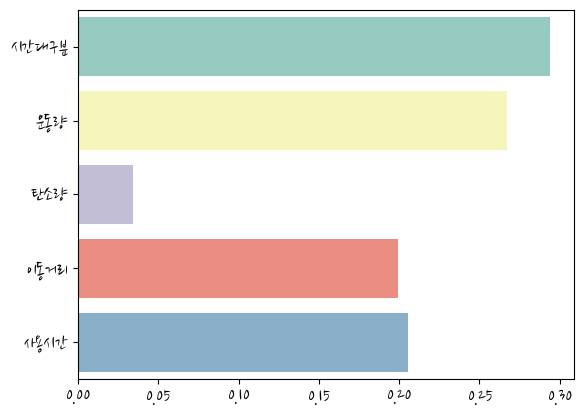

In [199]:
sns.barplot(x= dt_clf.feature_importances_, y=X.columns, palette='Set3')
plt.savefig('myfigure.png', transparent = True)

### 파라미터 조정

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [183]:
parameters = {
    'max_depth':[2,3,5,10],
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1,5,8]
}

In [184]:
grid_dclf = GridSearchCV(dt_clf, param_grid= parameters, scoring='accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)
print(grid_dclf.best_params_)
print(grid_dclf.best_score_)

KeyboardInterrupt: 

In [ ]:
best_dclf = grid_dclf.best_estimator_
dpred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpred)
print(accuracy)

### 앙상블 소프트 보팅

In [188]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [168]:
test

,시간대구분,운동량,탄소량,이동거리,사용시간,연령대코드
0,0,44.91,0.42,1800.0,11.0,1
1,0,53.28,0.48,2070.0,18.0,1
2,0,41.91,0.39,1680.0,9.0,1
3,0,19.17,0.20,880.0,6.0,3
4,0,17.74,0.15,640.0,2.0,1
...,...,...,...,...,...,...
551629,23,44.77,0.31,1330.0,5.0,4
551630,23,32.93,0.31,1320.0,7.0,1
551631,23,9.27,0.09,390.0,2.0,1
551632,23,24.24,0.20,850.0,3.0,1


In [170]:
X = test.drop(columns='연령대코드')
y = test['연령대코드']

In [172]:
X = test1.drop(columns='연령대코드')
y = test1['연령대코드']

In [189]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [146]:
# test1
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.40409872470020936


In [200]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(class_name, accuracy_score(y_test,pred))

LogisticRegression 0.3733809493596309
KNeighborsClassifier 0.3965484423577184


In [190]:
# test
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.40409872470020936


In [147]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(class_name, accuracy_score(y_test,pred))

LogisticRegression 0.3733809493596309
KNeighborsClassifier 0.3965484423577184


In [158]:
from lightgbm import LGBMClassifier

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=32)

lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.05)
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)

print(accuracy_score(y_test, preds))

[1]	training's multi_logloss: 1.43471	valid_1's multi_logloss: 1.43197
Training until validation scores don't improve for 100 rounds
[2]	training's multi_logloss: 1.43043	valid_1's multi_logloss: 1.4278
[3]	training's multi_logloss: 1.42674	valid_1's multi_logloss: 1.42423
[4]	training's multi_logloss: 1.42359	valid_1's multi_logloss: 1.4212
[5]	training's multi_logloss: 1.42085	valid_1's multi_logloss: 1.41857
[6]	training's multi_logloss: 1.41824	valid_1's multi_logloss: 1.41607
[7]	training's multi_logloss: 1.41596	valid_1's multi_logloss: 1.41398
[8]	training's multi_logloss: 1.41359	valid_1's multi_logloss: 1.41185
[9]	training's multi_logloss: 1.41159	valid_1's multi_logloss: 1.41006
[10]	training's multi_logloss: 1.40954	valid_1's multi_logloss: 1.40817
[11]	training's multi_logloss: 1.40781	valid_1's multi_logloss: 1.4065
[12]	training's multi_logloss: 1.40614	valid_1's multi_logloss: 1.40496
[13]	training's multi_logloss: 1.40459	valid_1's multi_logloss: 1.40358
[14]	training'

In [191]:
for name, value in zip(X.columns, lgbm.feature_importances_):
    print(name,':' ,value)

시간대구분 : 3993
운동량 : 6349
탄소량 : 2804
이동거리 : 3521
사용시간 : 4333


## 표 만들기

In [227]:
dd=pd.read_csv('2018_2021_전처리_최종.csv')

In [228]:
dd.columns

Index(['총생활인구수', '기온', '기압', '풍속', '운량', '일강수량', '최대순간풍속풍향', '최대풍속풍향', '평균풍속',
       '최다풍향', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부', '요일', '계절',
       'month', 'day', '영등포구'],
      dtype='object')

<AxesSubplot:xlabel='month', ylabel='영등포구'>

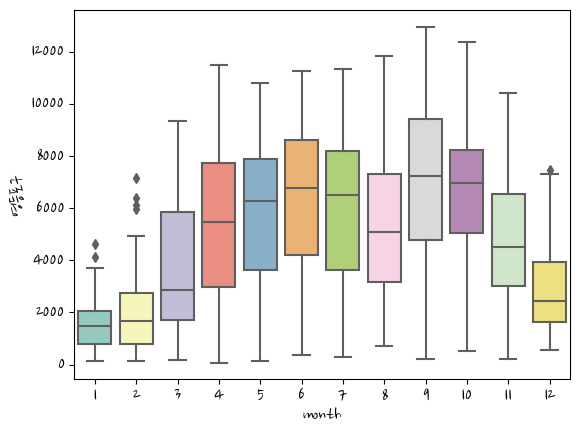

In [124]:
s(data=dd, x='month', y = '영등포구', palette='Set3')
# plt.savefig('myfigure.png', transparent = True)


In [115]:
df.groupy

,대여일자,대여시간,연령대코드,운동량,탄소량,이동거리,사용시간,year,month,day
0,2018-01-01,0,20대,44.91,0.42,1800.00,11.0,2018,1,1
1,2018-01-01,0,20대,53.28,0.48,2070.00,18.0,2018,1,1
2,2018-01-01,0,20대,41.91,0.39,1680.00,9.0,2018,1,1
3,2018-01-01,0,40대,19.17,0.20,880.00,6.0,2018,1,1
4,2018-01-01,0,20대,17.74,0.15,640.00,2.0,2018,1,1
...,...,...,...,...,...,...,...,...,...,...
13023406,2021-12-31,23,20대,50.55,0.41,1748.78,8.0,2021,12,31
13023407,2021-12-31,23,30대,42.41,0.35,1530.00,10.0,2021,12,31
13023408,2021-12-31,23,40대,15.72,0.10,441.09,3.0,2021,12,31
13023409,2021-12-31,23,50대,178.79,1.40,6020.00,32.0,2021,12,31


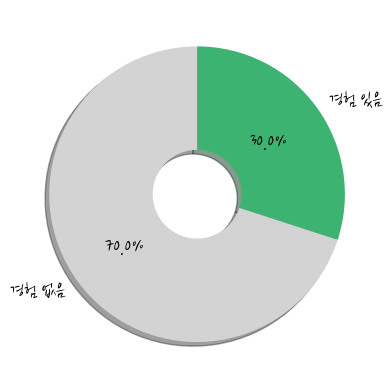

In [140]:
import matplotlib.pyplot as plt

ratio = [30, 70]
labels = ['경험 있음', '경험 없음']
colors = ['mediumseagreen','lightgray']
wedgeprops={'width': 0.7}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, shadow=True, colors=colors,wedgeprops=wedgeprops)

plt.savefig('myfigure.png', transparent = True)

In [145]:
dd.columns

Index(['총생활인구수', '기온', '기압', '풍속', '운량', '일강수량', '최대순간풍속풍향', '최대풍속풍향', '평균풍속',
       '최다풍향', '일최심적설', '일최심신적설', '강수여부', '일 미세먼지 농도(㎍/㎥)', '휴일여부', '요일', '계절',
       'month', 'day', '영등포구'],
      dtype='object')

In [225]:
test5.sample(5)

,평균기온,최저기온,최고기온,일강수량,최대순간풍속,최대순간풍속풍향,최대풍속,최대풍속풍향,평균풍속,최다풍향,...,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,year,month,day,영등포구
1053,13.6,6.9,19.1,86.9,13.4,180,7.3,230,4.2,270,...,0.0,1.0,0.0,0,3,3,2020,11,19,2553.0
977,23.3,19.9,27.5,0.0,9.7,180,5.6,200,2.7,200,...,0.0,0.0,19.0,0,4,3,2020,9,4,10969.0
887,24.6,19.2,30.9,0.0,7.8,290,4.4,290,2.0,290,...,0.0,0.0,48.0,1,5,2,2020,6,6,9061.0
1075,5.3,2.6,9.4,0.0,7.7,270,4.5,250,1.8,270,...,0.0,0.0,0.0,0,4,4,2020,12,11,4277.0
1041,14.6,12.2,18.1,0.1,10.1,250,4.9,270,2.7,230,...,0.0,1.0,115.0,0,5,3,2020,11,7,5968.0


In [229]:
dd.sample(5)

,총생활인구수,기온,기압,풍속,운량,일강수량,최대순간풍속풍향,최대풍속풍향,평균풍속,최다풍향,일최심적설,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,month,day,영등포구
493,4.735941e+05,-0.368954,-0.506423,0.369877,-1.683221,0.0,270,250,2.2,270,0.0,0.0,0.0,46.0,0,3,1,5,9,6109.0
264,1.020678e+07,-1.357741,0.351015,0.933752,-0.596118,6.5,270,270,1.8,270,0.0,0.0,1.0,29.0,0,5,3,9,22,4112.0
894,4.229759e+05,-2.332886,0.749542,0.332449,-0.905086,0.0,290,290,1.9,290,0.0,0.0,0.0,52.0,0,5,2,6,13,7200.0
939,4.796379e+05,-2.212787,1.691516,-1.598751,2.443326,0.4,70,50,2.0,50,0.0,0.0,1.0,14.0,0,1,2,7,28,5357.0
344,1.206574e+07,2.565719,-1.074023,-0.948242,-1.400975,0.0,360,340,1.2,20,0.0,0.0,0.0,47.0,0,1,4,12,11,1865.0
